<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>


<b><center><font size="6">Cours - Econométrie en finance - Séance 8</font></center></b>
    
<g><h7><center> CM - P. Durand  - pierre.durand@u-pec.fr </center></h7></g>

<g><h7><center> TD - A. Birem  - abderraouf.birem@etu.u-pec.fr </center></h7></g>


<b><center><font size="5">M1 - 2024-2025</font></center></b> 



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">


 


<br>
<b>Plan du cours : </b>

- Séance 1 – Introduction générale & Introduction avancée à Python
- Séance 2 – Rappels économétriques et bases de données sous python
- Séance 3 – Modèle de régression simple
- Séance 4 - Modèle de régression multiple
- Séance 5 – Violation des hypothèses (1)
- Séance 6 – Violation des hypothèses (2)
- Séance 7 – Caractéristiques des séries temporelles
- <b>Séance 8 – Stationnarité et conséquences, tests de racine unitaire</b>
- Séance 9 – Modélisation en série temporelles : ARMA-ARCH
- Séance 10 - Modèles VAR et correction d'erreur
- Séance 11 – Introduction aux modèles de classification : logit



<b>Références en Econométrie</b> :

- Pesaran, M. H. (2015). Time series and panel data econometrics. Oxford University Press.

- Bourbonnais, R. (2008), Econométrie, Dunod, 7e édition.

- Mignon, V. (2008), Econométrie : Théorie et applications.

- Lardic, S. & Mignon, V. (2002), Econométrie des séries temporelles macroéconomiques et financières.


<b>Références pour la finance</b>  :

-	Finance de marché (Portait – Poncet)
-	Recent advances in linear models and related areas (Shalabh – Heumann)

<b>Références pour python</b>  :

- Presque tout est gratuit et en open source sur internet
- Liste non exhaustive de livres : <a href="https://python.developpez.com/livres/"> python.developper</a>



<br>
<hr style=" border: .5px solid black;">

<a id='plan'></a>
<br>
<b>Séance 8 : </b>


- [Introduction : quelques rappels](#p0)
- [1. Processus TS et processus DS](#p1)
    - [1.1 Processus TS](#p1.1)
    - [1.2 Processus DS](#p1.2)
- [2. Saisonnalité](#p2)
    - [2.1 Saisonnalité et conséquences](#p2.1)
    - [2.2 Décomposition tendance-saisons : traitement de la saisonnalité](#p2.2)
- [3. Détection de la non-stationnarité](#p3)
    - [3.1 Test de Dickey-Fuller](#p3.1)
    - [3.2 Test de Dickey-Fuller Augmenté](#p3.2)
    - [3.3 Application](#p3.3) 

      
    



</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: 2.5px solid black;">


# Introduction <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p0'></a>

<br>  
    
  $$ Y_t = \alpha +\beta_1 X_{1,t}+\beta_2  X_{2,t}+ \cdots +\epsilon_t$$
    
- On se situe ici dans le cadre de séries temporelles : un individu sur plusieurs périodes. 
    
période = fréquence 
    
Haute fréquence : donnée très rapproché
    
Basse fréquence : donnée sur une année
    
- Nous focalisant sur des séries temporelles : introduction de modèles dynamiques
    
<br>
    
- Modèles à retards échelonnés : introduit de la dynamique dans les retards variable explicative 
    
$$Y_t = \mu + \delta_0 X_t + \delta_1 X_{t-1} + \delta_2 X_{t-2} + ... + \delta_h X_{t-h} + \epsilon_t$$
 
    
    
- Modèles autorégressifs : introduit de la dynamique dans les retards variable expliquée 
    
$$Y_t = \mu + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + ... + \phi_p Y_{t-p} +\epsilon_t$$
    

<br>
    
    
- Modèles ARDL (autorégressifs et à retards échelonnés) : d'ordre  $P,Q$
    
$$Y_t = \mu + \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + ... + \phi_p Y_{t-p} + \delta_0 X_t + \delta_1 X_{t-1} + \delta_2 X_{t-2} + ... + \delta_h X_{t-h} + \epsilon_t$$
    
    
<br>

- Introduction du polynôme retards (où $L^iX_t = X_{t-i}$): 
    
$$D_h(L) = \delta_0 + \delta_1 L + \delta_2 L^2 + ... + \delta_h L^h$$
    
<br>
    interet de la dynamiques :
    
- modèliser une relation 
- prendre en compte la structure temporell des séries et de leurs déterminants
- établir des prévision (indicateur avancés de crise(sujet de mémoire), prédire le cours d'une action

    
<br>
    

<br>
    
    
    
- <b>Principal objet d'étude (comme sphéricité, multicolinéarité etc... pour les MCO) : la stationnarité</b>
    
<br>    
    
    
- Définitions de la stationnarité au second ordre d'un processus $Y_t$ :
    - Le moment d'ordre $2$ est fini et constant au cours du temps (homoscédasticité) : $E(Y_t^2) < \infty$, $\forall t$
    - La moyenne est constante : $E(Y_t) = m$, $\forall t$, elle ne dépend pas du temps 
    - La covariance entre $t$ et $t+h$ ne dépend que de $h$ : $Cov(Y_t,Y_{t+h}) = \gamma_h$, $\forall t,h$
    
    
    
<br>
    
    
<b>Première approche de la stationnarité : l'approche graphique</b>
    

- Premier outil : les corrélogrammes. Nous avions défini la fonction d'autocovariance :
    
    
$$ \gamma_h = Cov(Y_t,Y_{t+h}) = E((Y_t - E(Y_t))(Y_{t+h} - E(Y_{t+h}))$$
    
- Cela nous avait permis de définir la fonction d'autocorrélation (liaisons temporelles d'une série) : 
    
$$\rho_h = \frac{\gamma_h}{\gamma_0} $$


- Nous introduisons également la fonction d'autocorrélation partielle (influence entre $t$ et $t-h$ en retirant l'influence des toutes les périodes entre : $t-h+i$ avec $i<h$). Forme fonctionnelle complexe.
    
<br>
    
- Les corrélogrammes permettent d'identifier la structure autorégressive d'une série :
    - aucune autocorrélation : processus sans mémoire (bruit blanc)
    - faible autocorrélation : processus de mémoire courte
    - forte autocorrélation : processus à mémoire longue (variable avec tendance forte)
    

 

</span>

In [3]:
import numpy as np

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

import matplotlib.pyplot as plt

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    

<br>
    
<b> Exemple 1 : processus sans mémoire</b>
    
<br>
    
$$Y_t = \epsilon_t$$
    
<br>

</span>

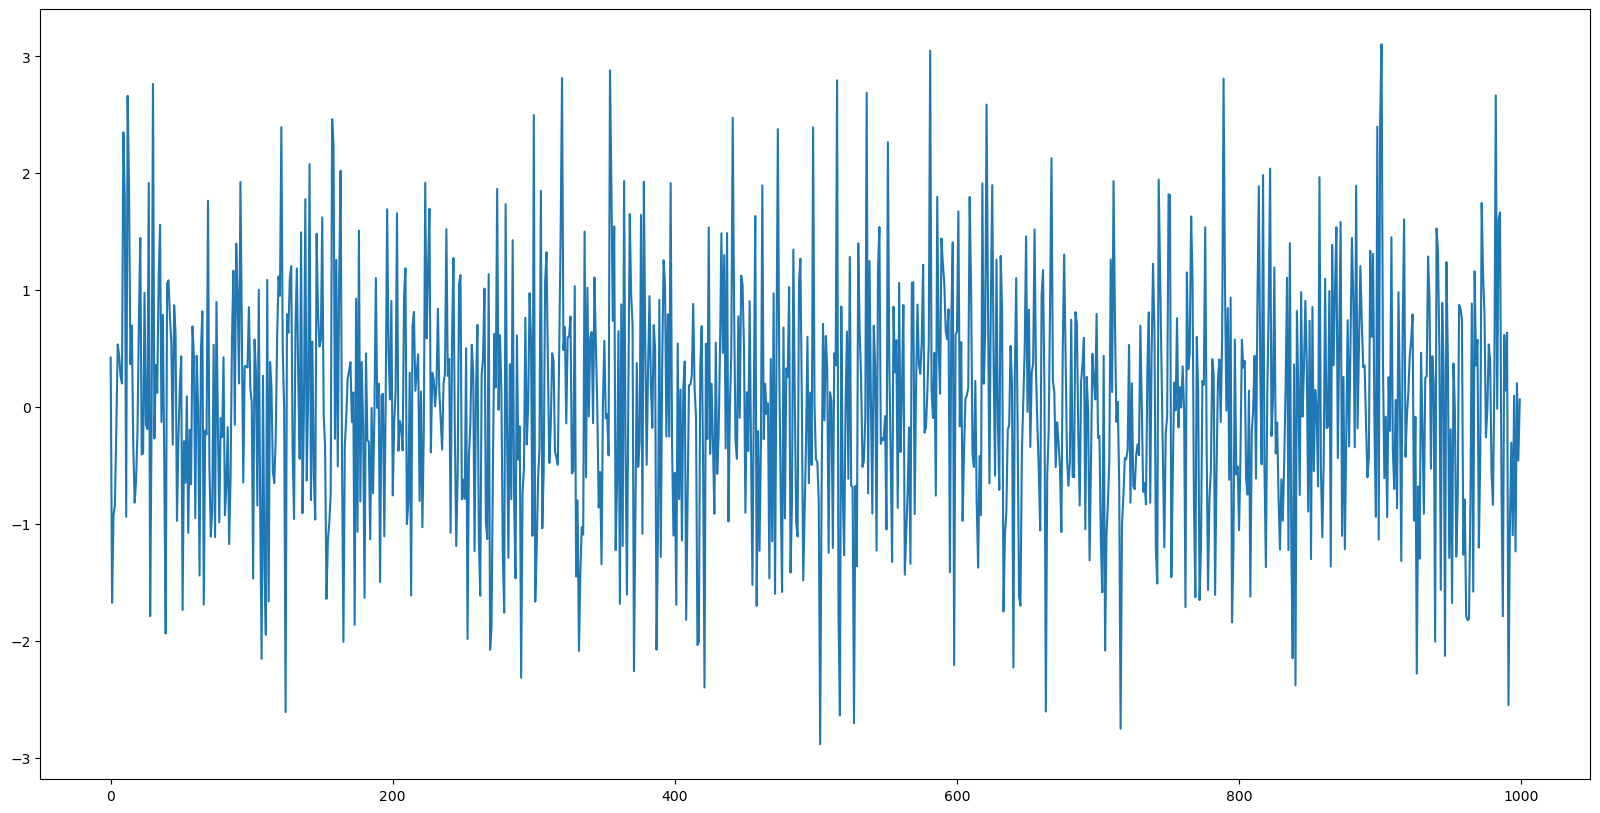

In [4]:
# aucune mémoire

X = np.random.normal(0, 1, 1000)

plt.rcParams['figure.figsize'] = (20,10)

plt.plot(X)
plt.show()

a priori pas de processus autorégressif

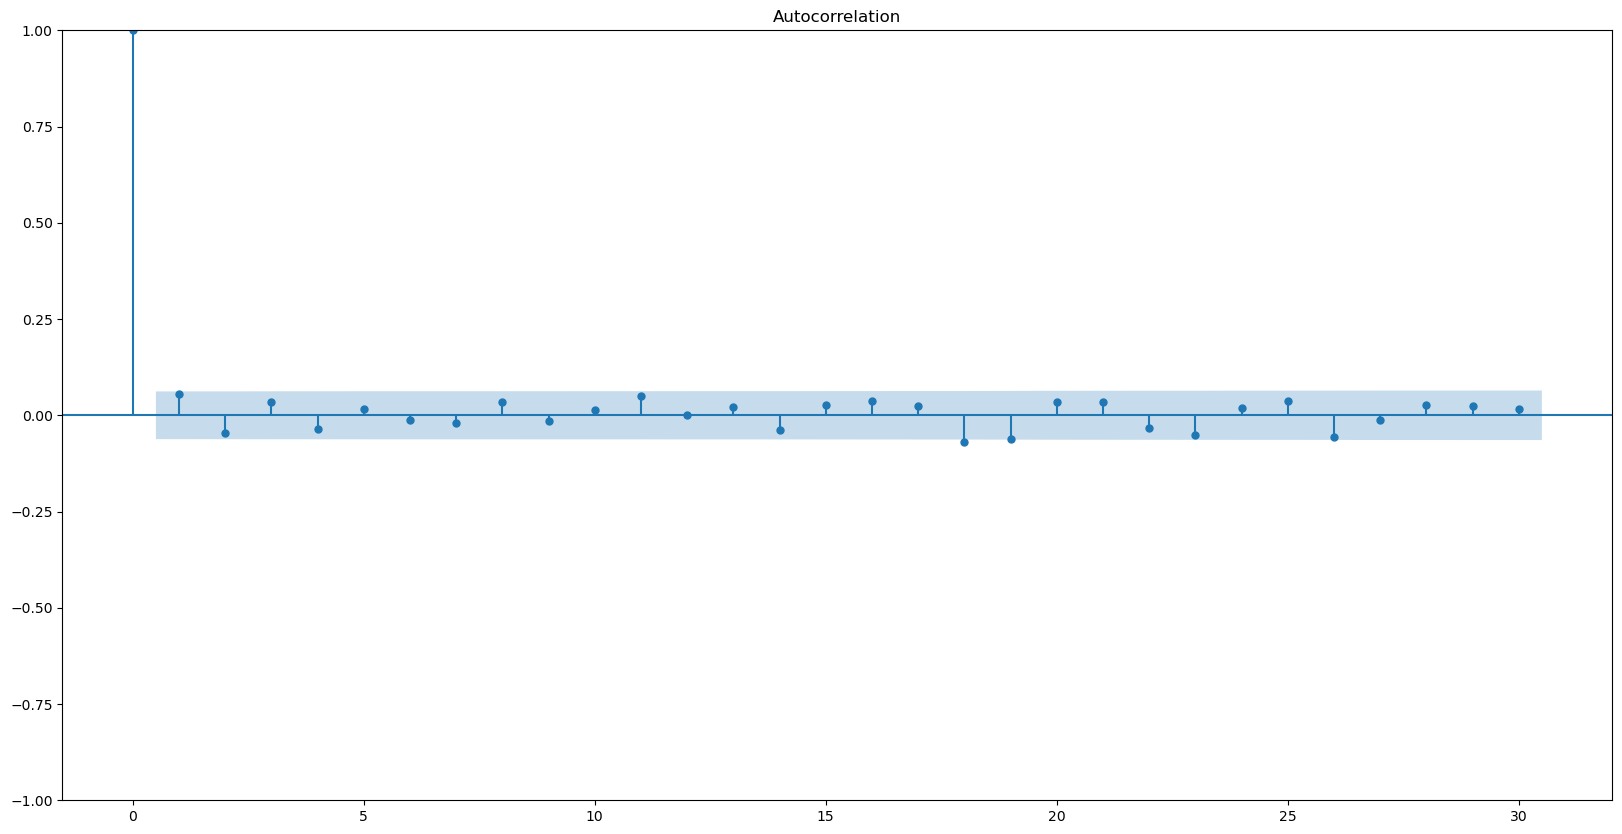

In [5]:
# corrélogramme
plt.rcParams['figure.figsize'] = (20,10)

plot_acf(X, lags=30)
plt.show()

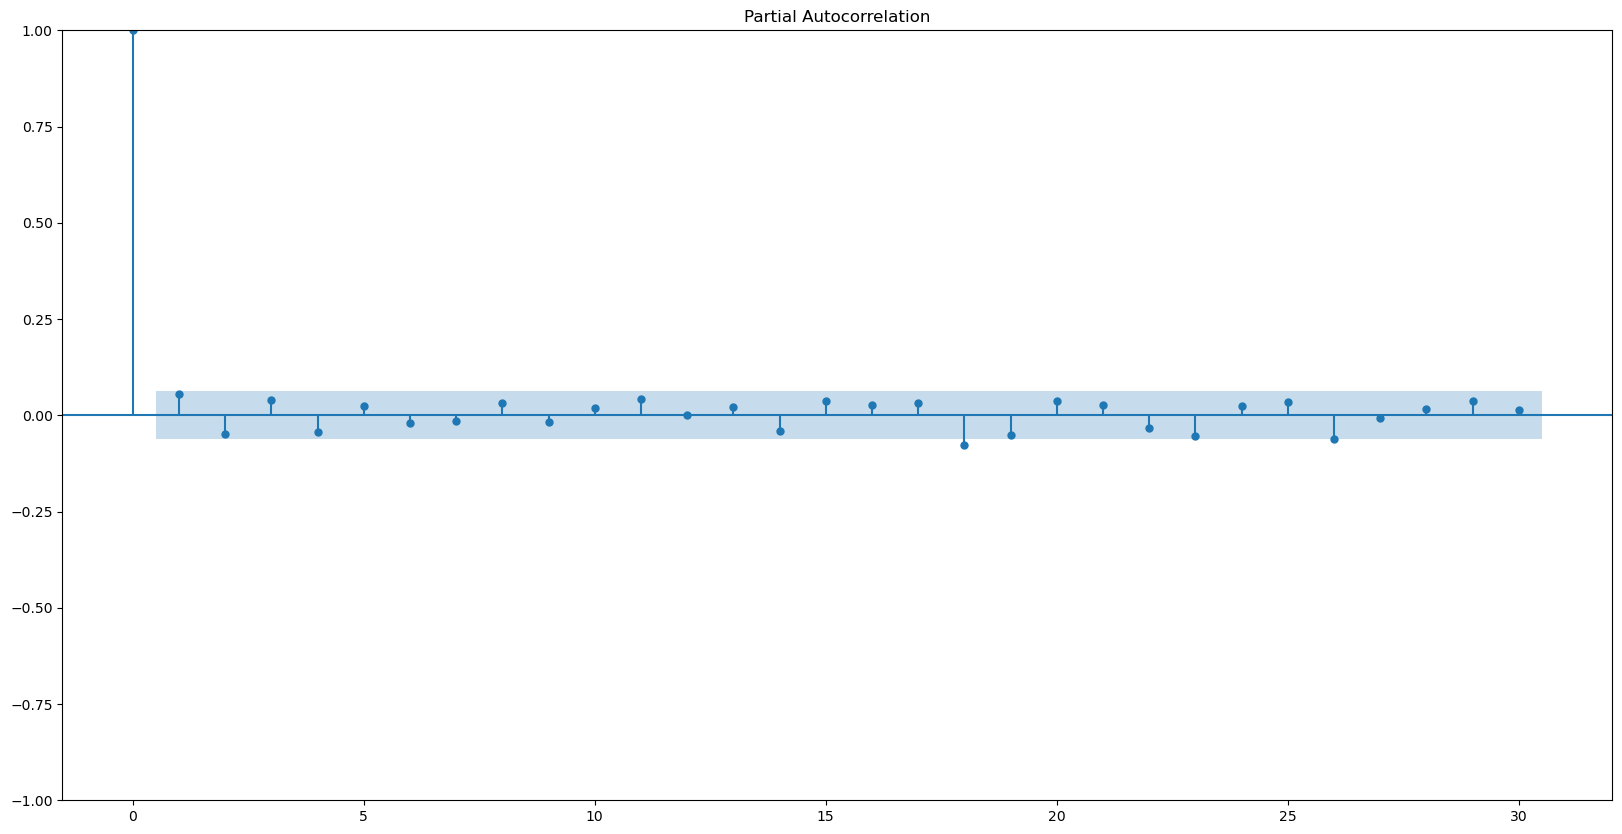

In [6]:
# corrélogramme : autocorrélation partielle
plt.rcParams['figure.figsize'] = (20,10)

plot_pacf(X, lags=30)
plt.show()

Premier point  autocorrelation en t et t 

deuxème etre t et t-1

zone bleu  : non significatif

out zone bleu : significative

zone bleu intervalle de confiance

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    


<br>
    
<b> Exemple 2 : processus à mémoire courte</b>
    
<br>
    
$$Y_t = Y_{t-1} + \epsilon_t$$
    
   processus AR d'ordre 1 
Toutes les 20 périodes on pose : $Y_t = Y_{0}$ où $Y_{0} = 1$
<br>

</span>

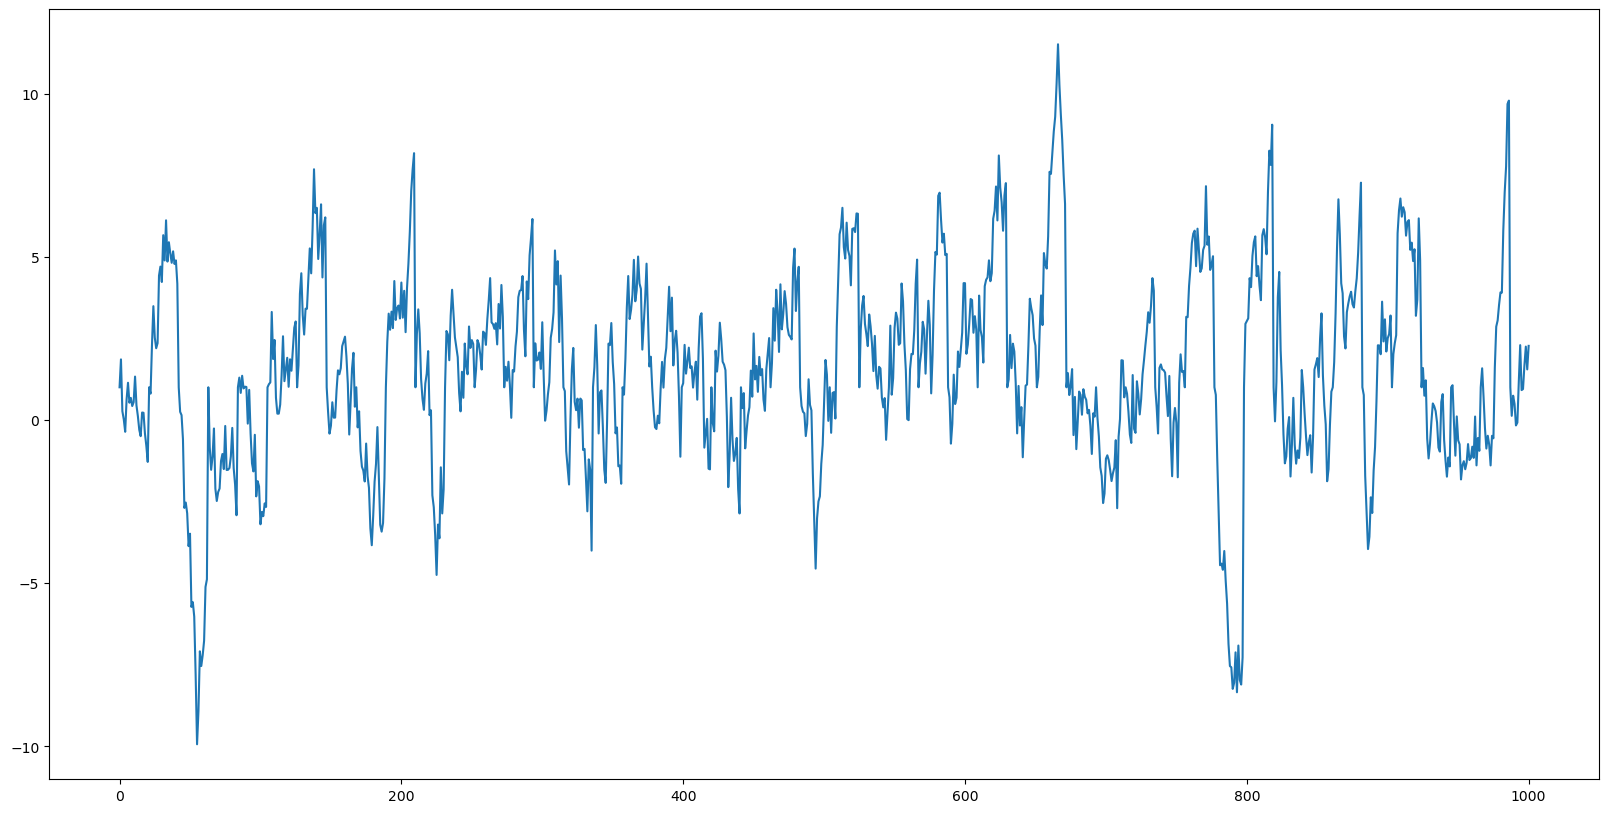

In [7]:
# mémoire courte
init = 1
X = [init]

obs = 0
c = 0

while obs < 1000 :
    if c < 20 :
        epsilon = np.random.normal(0,1)
        X.append(X[-1] + epsilon)
        obs += 1
        c += 1
    else :
        X.append(init)
        obs += 1
        c = 0
    
    
plt.plot(X)
plt.show()

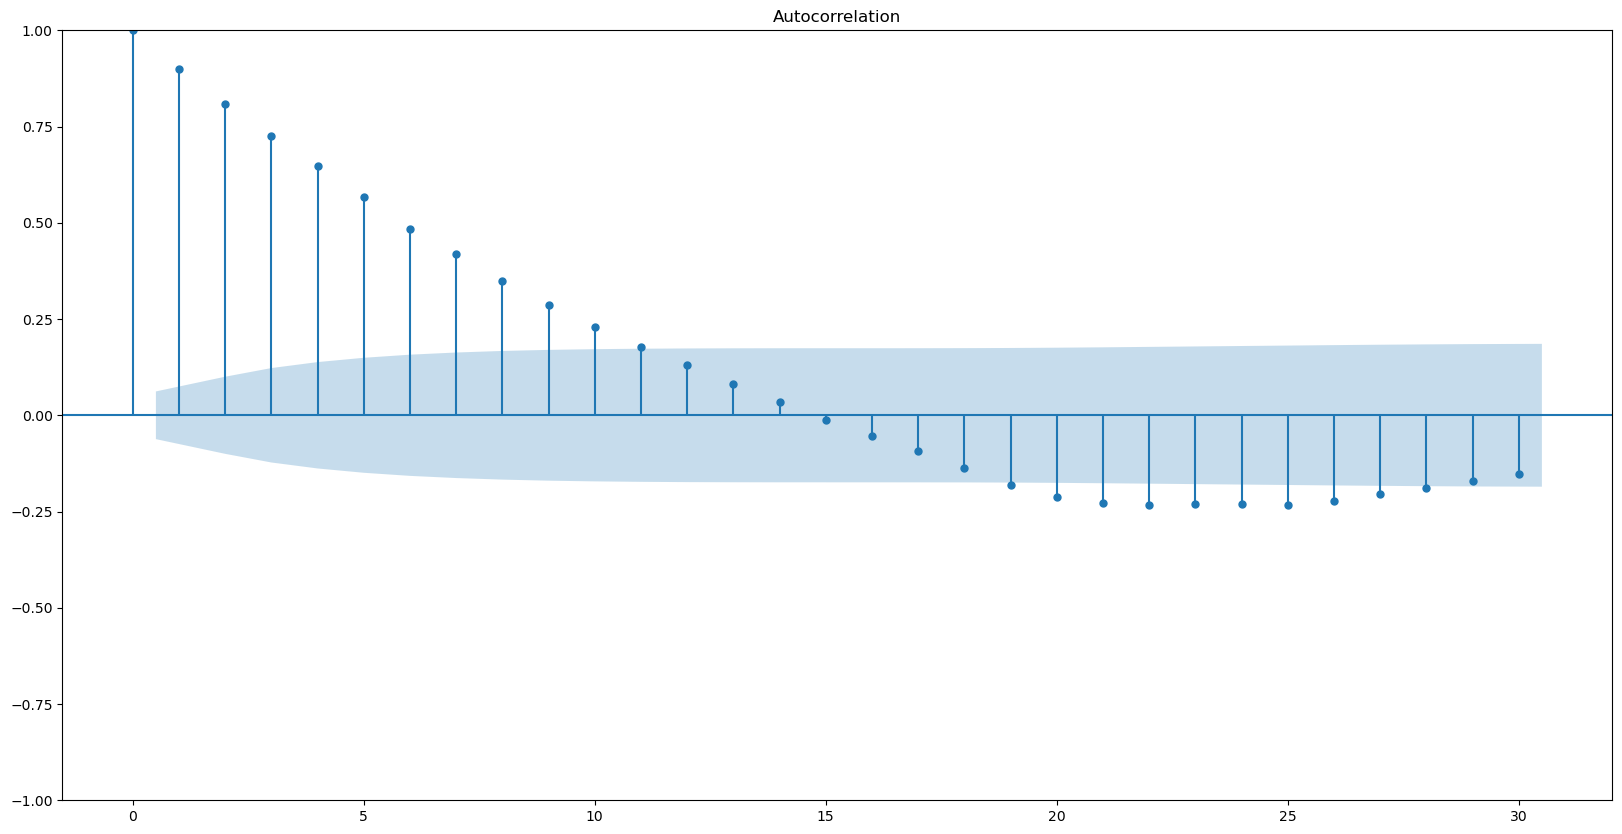

In [8]:
# corrélogramme
plt.rcParams['figure.figsize'] = (20,10)

plot_acf(X, lags=30)
plt.show()

autocorrelation significative jusqu’a l’ordre 12

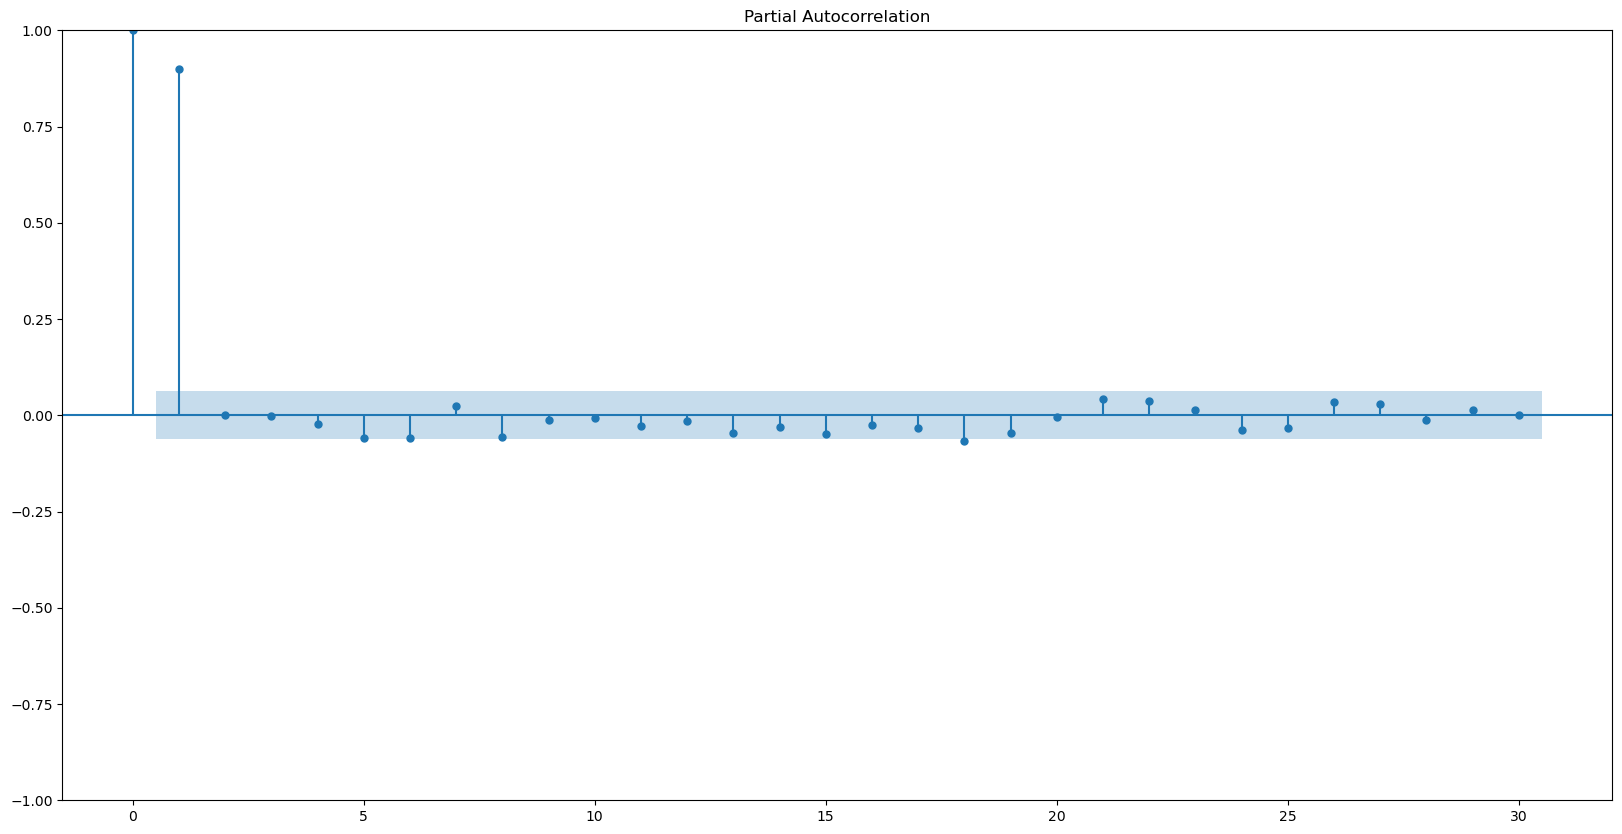

In [9]:
# corrélogramme : autocorrélation partielle
plt.rcParams['figure.figsize'] = (20,10)

plot_pacf(X, lags=30)
plt.show()

c'est le graphe de l'autocorrelation partielle

la relation est que forte entre $y_t$ et $y_{t-1}$

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<br>
    
<b> Exemple 3 : processus à mémoire longue</b>
    
<br>
    
$$Y_t = Y_{t-1} + \epsilon_t$$
    
    
Sans réstrictions.
<br>

</span>

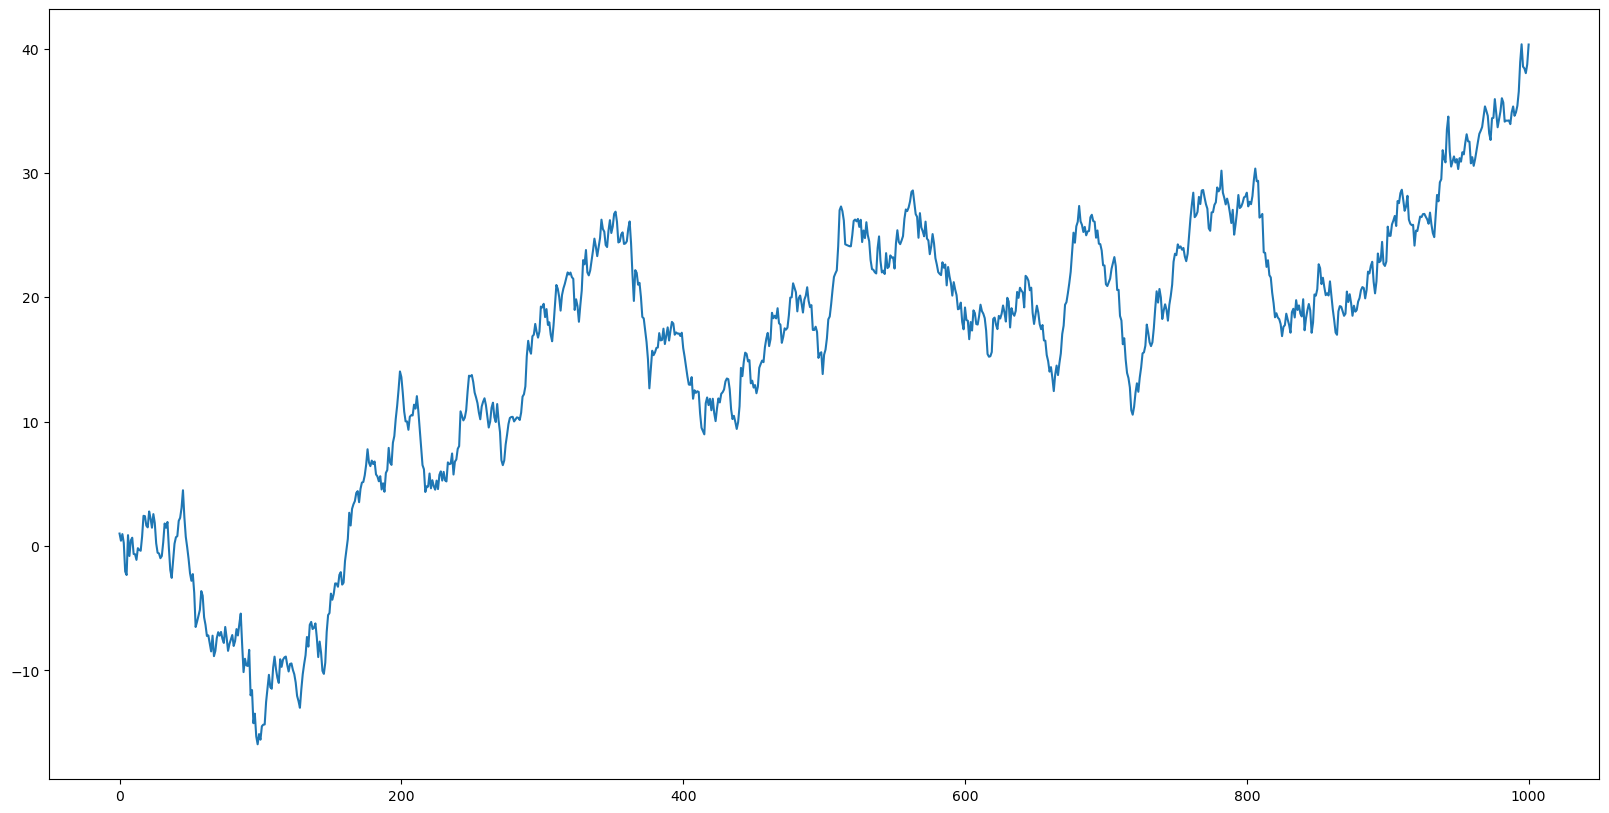

In [10]:
# mémoire longue 
init = 1
X = [init]

obs = 0

while obs < 1000 :
    epsilon = np.random.normal(0,1)
    X.append(X[-1] + epsilon)
    obs += 1
    
    
plt.plot(X)
plt.show()

structure autoregressive autoregressive assez forte

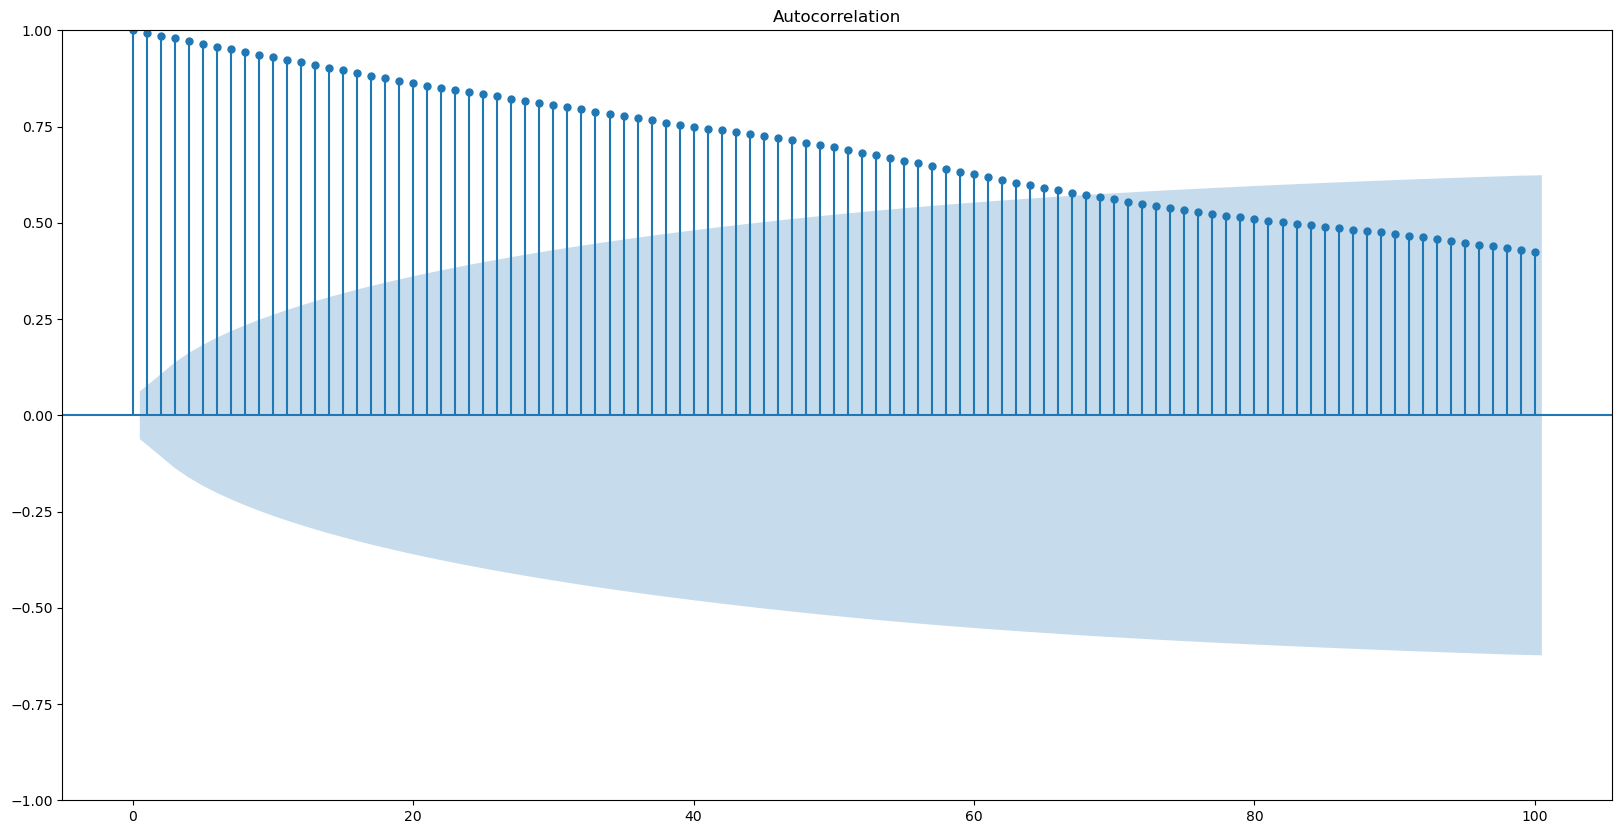

In [11]:
# corrélogramme
plt.rcParams['figure.figsize'] = (20,10)

plot_acf(X, lags=100)
plt.show()

Autocorrélation très forte 

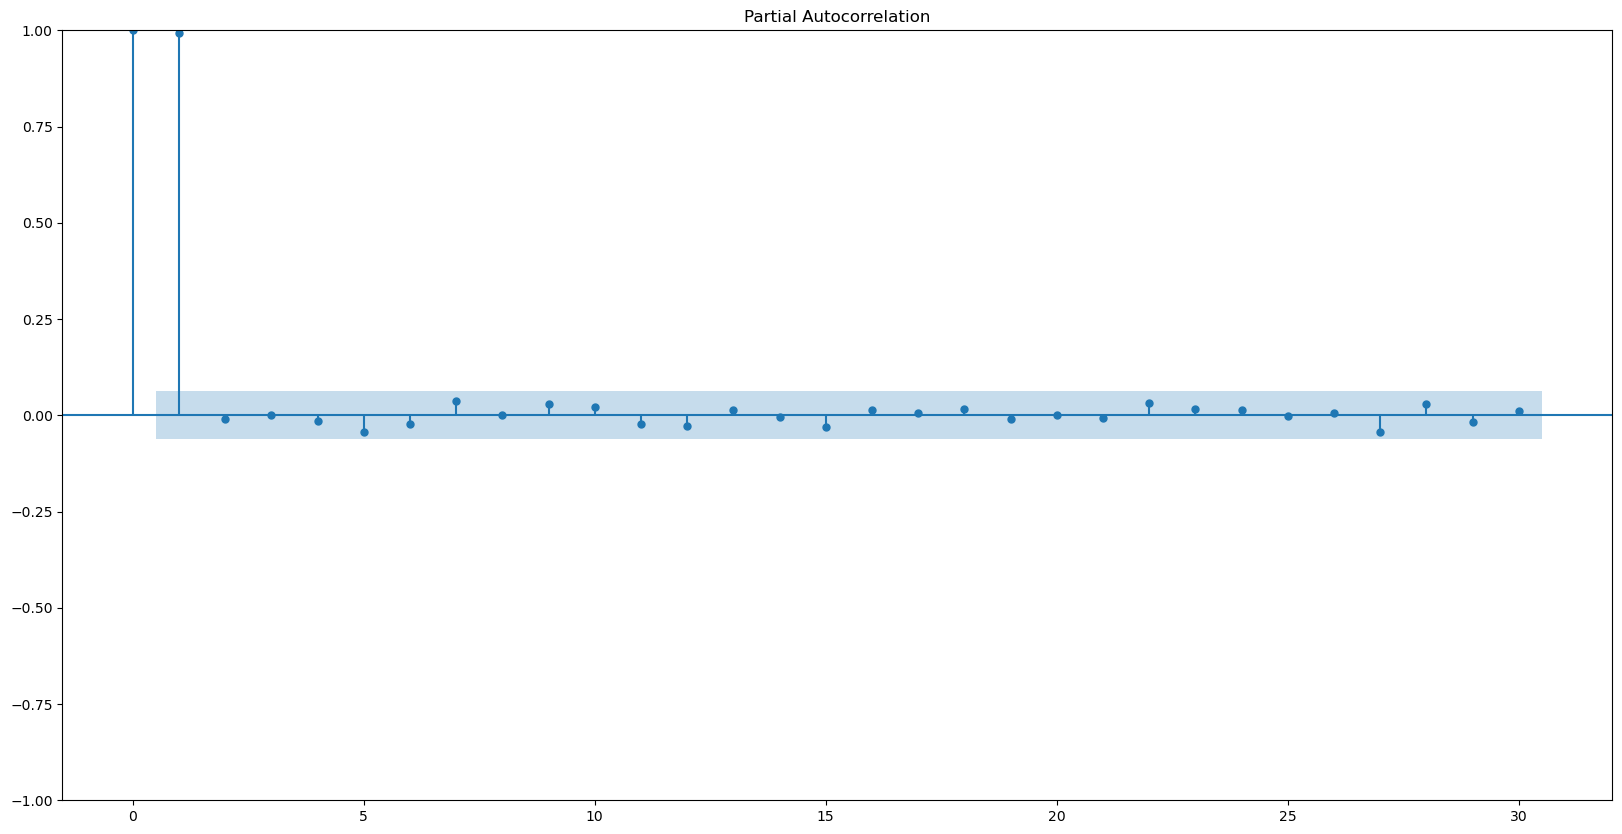

In [12]:
# corrélogramme : autocorrélation partielle
plt.rcParams['figure.figsize'] = (20,10)

plot_pacf(X, lags=30)
plt.show()

L'AC partielle la même car on juste t-1

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<br>
    
<b> Exemple 4 : processus autorégressif d'ordre 4</b>
    
<br>
    
$$Y_t = Y_{t-1} -0.2 Y_{t-2} + 0.01Y_{t-3} - 0.05Y_{t-4}+ \epsilon_t$$
    
    
Sans réstrictions.
<br>

</span>

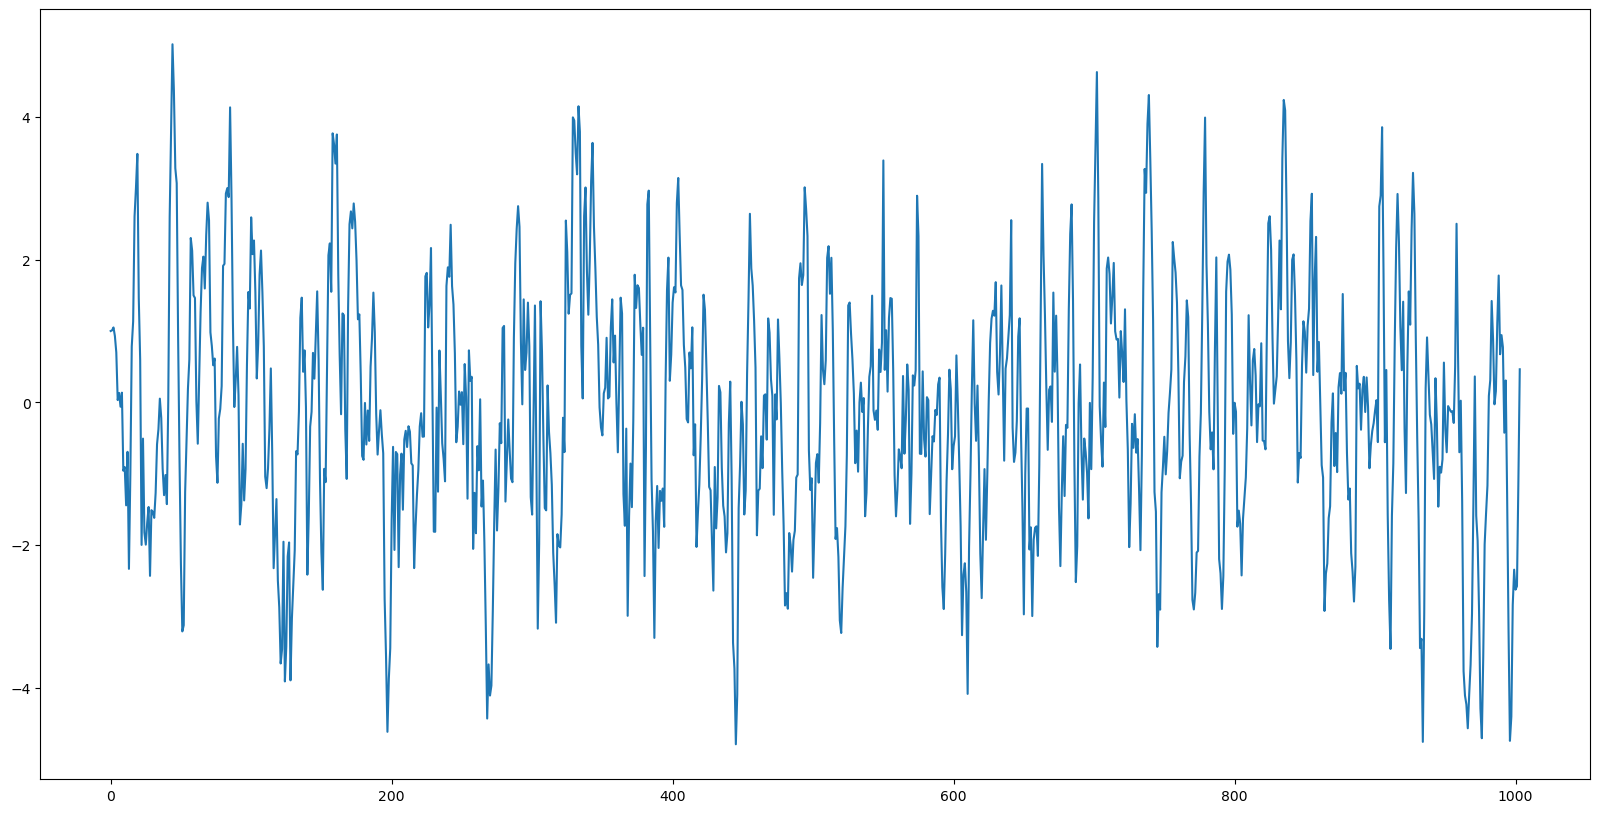

In [13]:
# processus autorégressif d'ordre 4
X = [1,1.01,1.05,0.93]

obs = 0

while obs < 1000 :
    epsilon = np.random.normal(0,1)
    X.append( X[-1] - 0.2*X[-2] + 0.01*X[-3] - 0.05*X[-4] + epsilon)
    obs += 1
    
    
plt.plot(X)
plt.show()

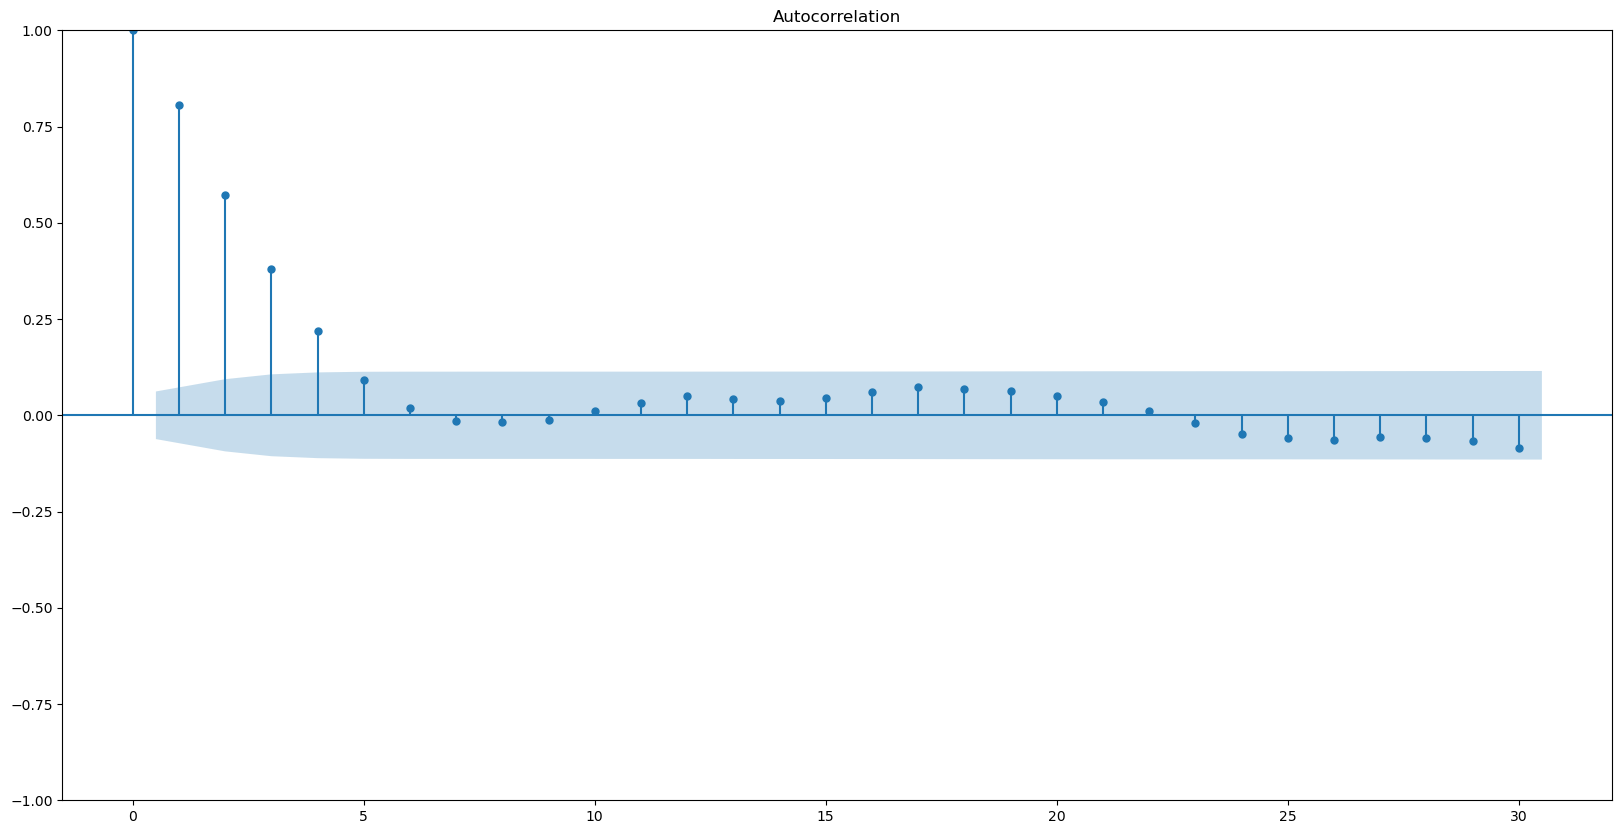

In [14]:
# corrélogramme
plt.rcParams['figure.figsize'] = (20,10)

plot_acf(X, lags=30)
plt.show()

significative jusqu'à t-4

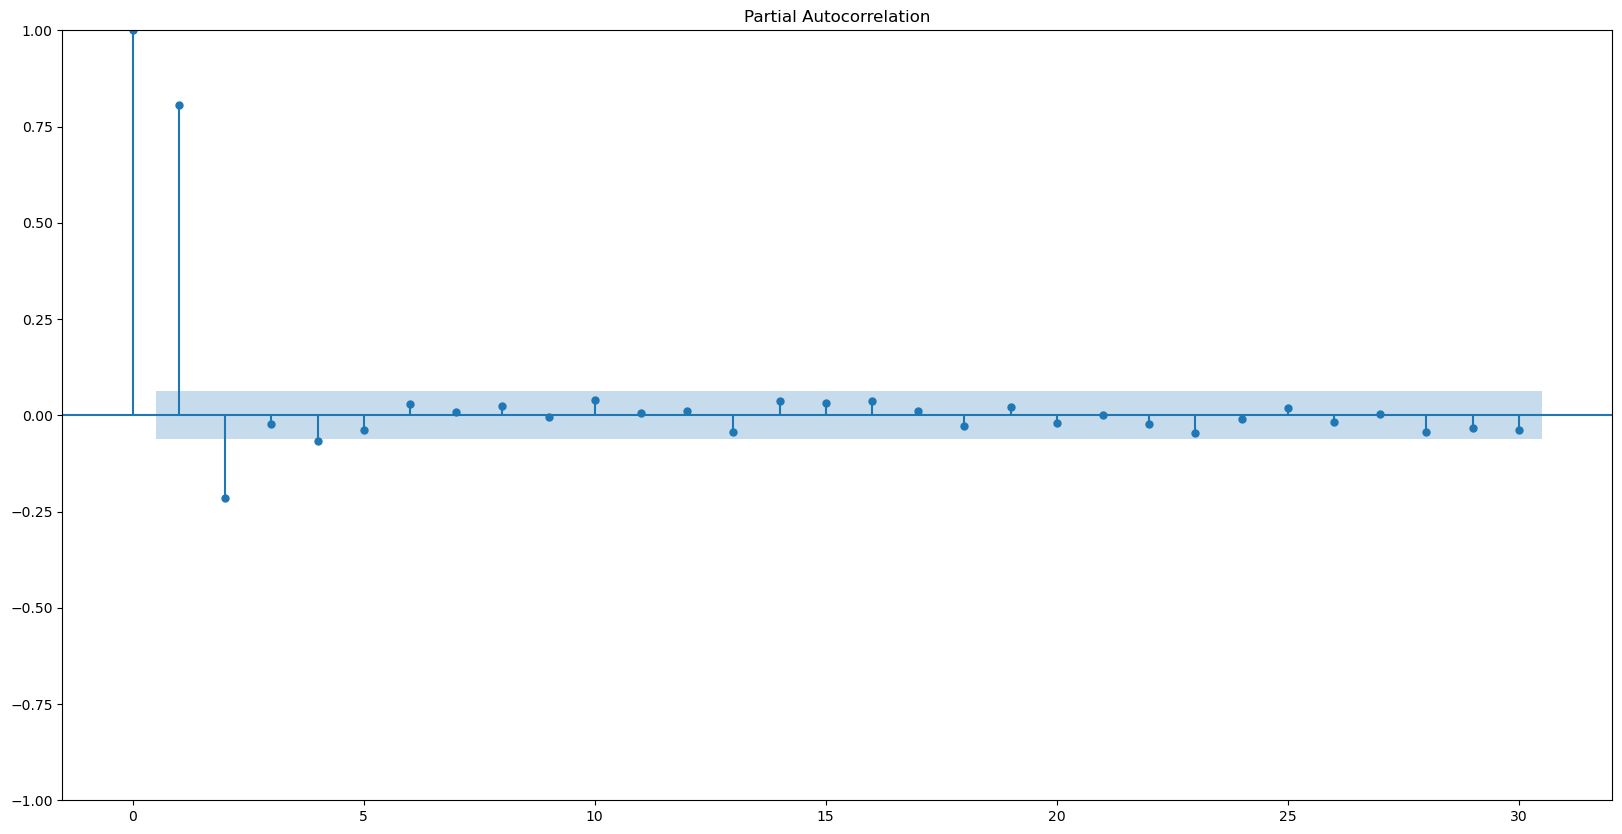

In [15]:
# corrélogramme : autocorrélation partielle
plt.rcParams['figure.figsize'] = (20,10)

plot_pacf(X, lags=30)
plt.show()

ici on voit jusqu'à l'ordre 3

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: 2.5px solid black;">


# Processus TS et processus DS <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p1'></a>


    
    

<hr style=" border: .5px solid black;">  
    
    
## Processus TS <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p1.1'></a>

<br>
    
- Dans le cas simple : tendance polynomiale d'ordre 1 : 
    
$$Y_t = \gamma + t \beta + \epsilon_t$$
    
où $t$ désigne le temps.
    
<br>
    

  
    

    
</span>

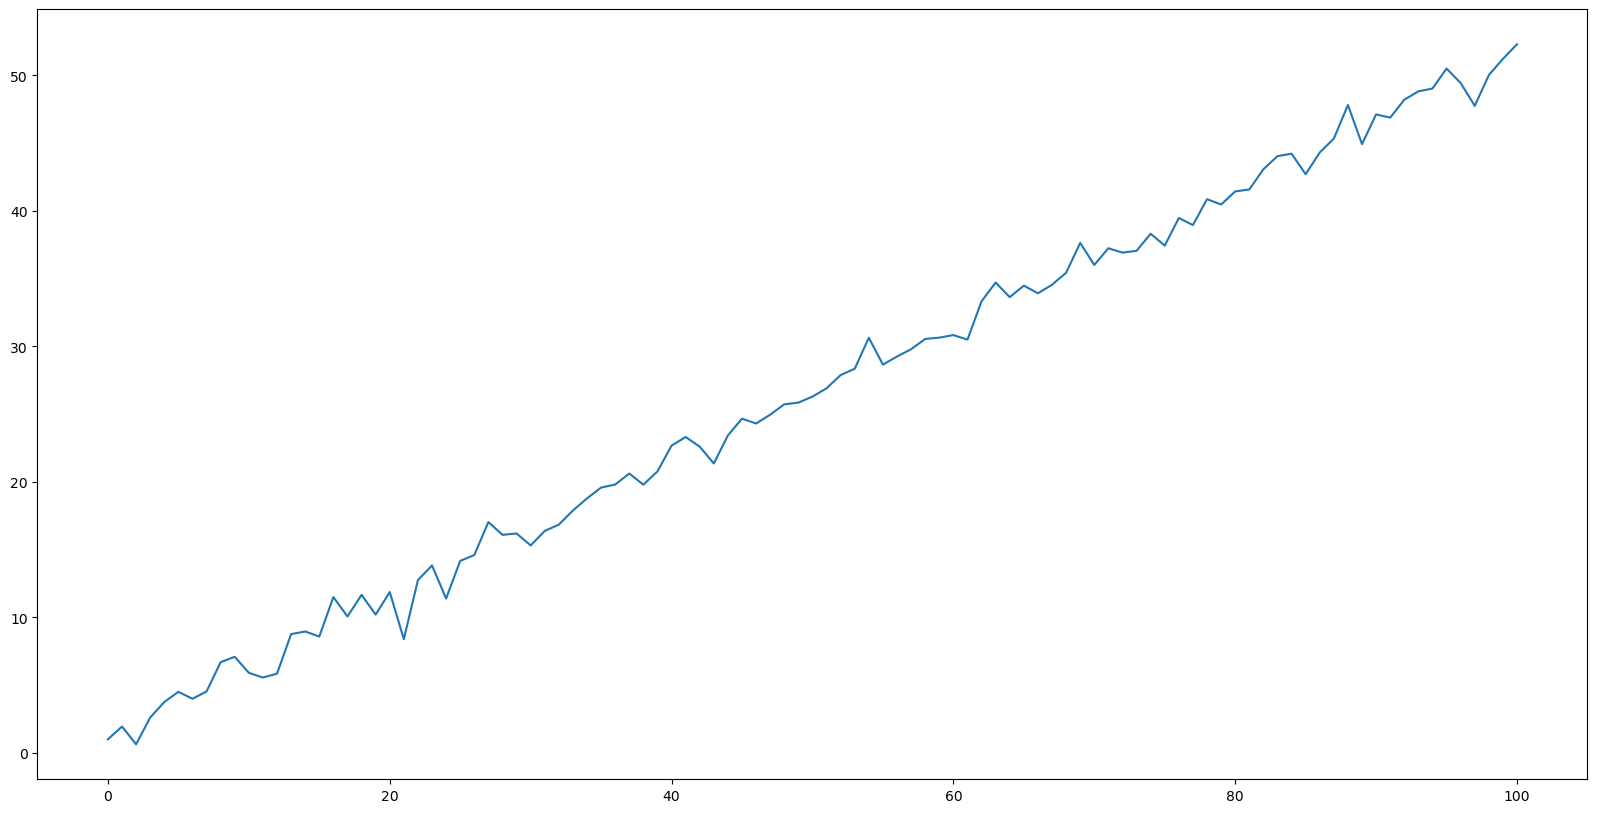

In [16]:
# Exemple d'un processus TS : Y = 2 + 0.5*t + epsilon

init = 1
X = [init]

obs = 0

while obs < 100 :
    epsilon = np.random.normal(0,1)
    X.append(2 + 0.5*obs + epsilon)
    obs += 1
    
    
plt.plot(X)
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>     
<br>
    
- Dans le cas d'un processus TS, on pourra régresser le modèle en "purgeant" la variable de sa tendance déterministe 
    
    
<br>
    
    
<hr style=" border: .5px solid black;">  
    
    
## Processus DS <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p1.2'></a>

<br>
    
- Le processus DS est un processus non stationnaire que l'on peut stationnariser en appliquant une différence.
    
- Le processus DS peut s'écrire (dans son cas le plus simple) : 
    
$$Y_t = \gamma + Y_{t-1} + \epsilon_t$$
    
    
<br>
    
- Ainsi en appliquant une différence simple on a :
    
$$Y_t - Y_{t-1} = \gamma + \epsilon_t$$
    
- D'où, si $\epsilon$ est stationnaire (un bruit blanc par exemple), la différence première est stationnaire. 
    
<br>
    
- On remarque que ce processus est une suite : on peut retrouver son espérance par récurrence :
    
$$ E(Y_t) = E\left[Y_0 + t\gamma + \sum_{j=1}^t\epsilon_j \right]$$
    
$$ E(Y_t) = Y_0 + t\gamma$$

<br>

- On obtient également que : 
    
$$V(Y_t) = t\sigma_{\epsilon}^2$$
    
- Enfin : 
    
$$Cov(Y_t,Y_s) = min(t,s)\sigma_{\epsilon}^2$$
    
<br>
    
- Ainsi : espérance et variance d'un processus DS dépendent du temps $t$.
    - la non stationnarité d'un processus DS : déterministe (par l'espérance)
    - ... et stochastique : variance suit une tendance linéaire
    
</span>

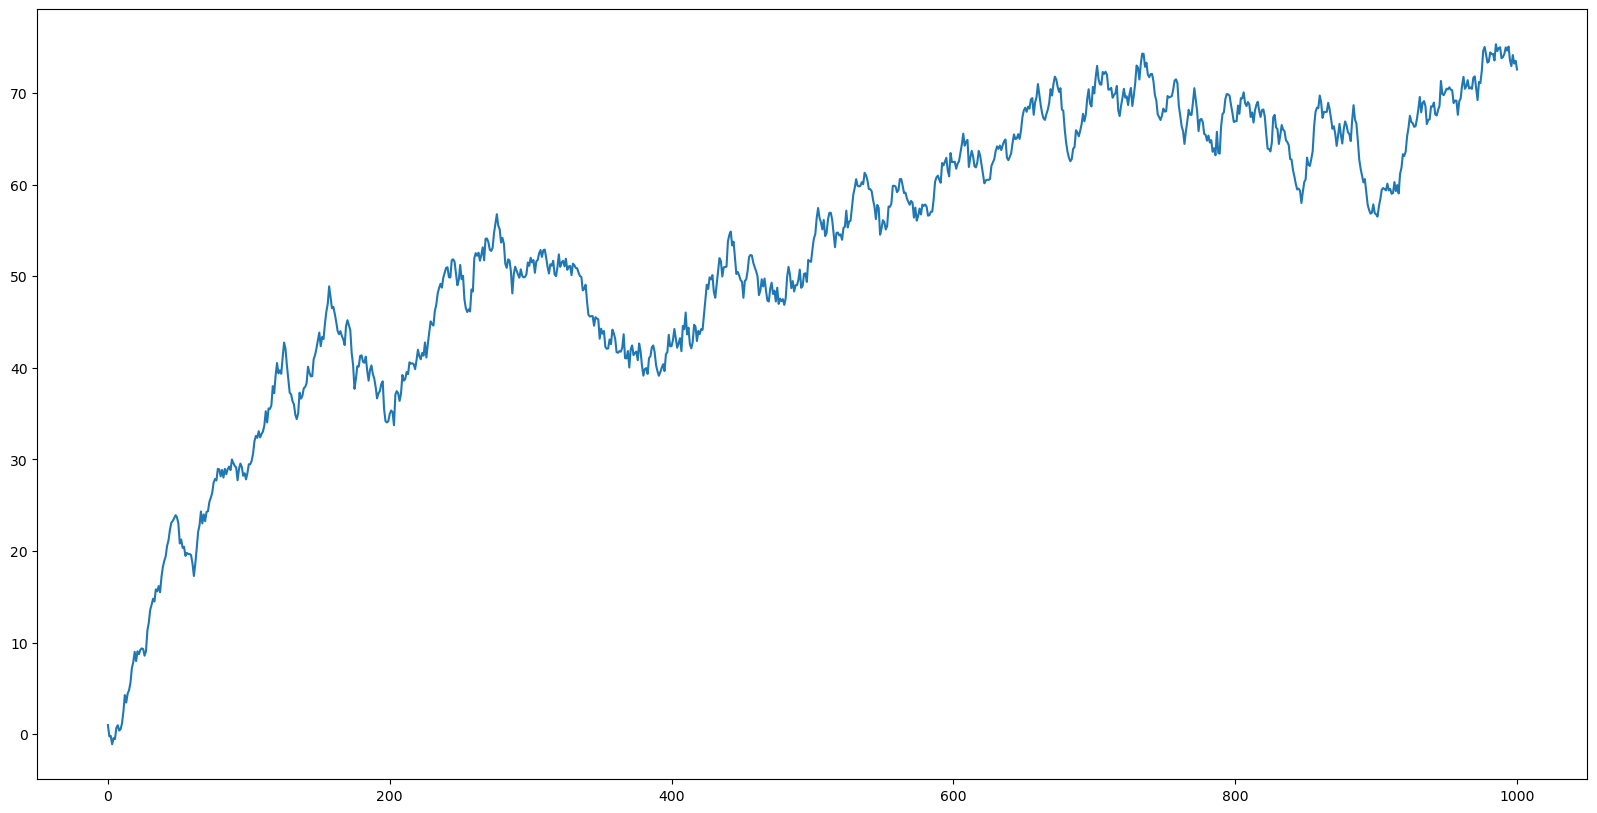

In [17]:
# mémoire longue 
init = 1
X = [init]

obs = 0

while obs < 1000 :
    epsilon = np.random.normal(0,1)
    X.append(0.05 + X[-1] + epsilon)
    obs += 1
    
    
plt.plot(X)
plt.show()

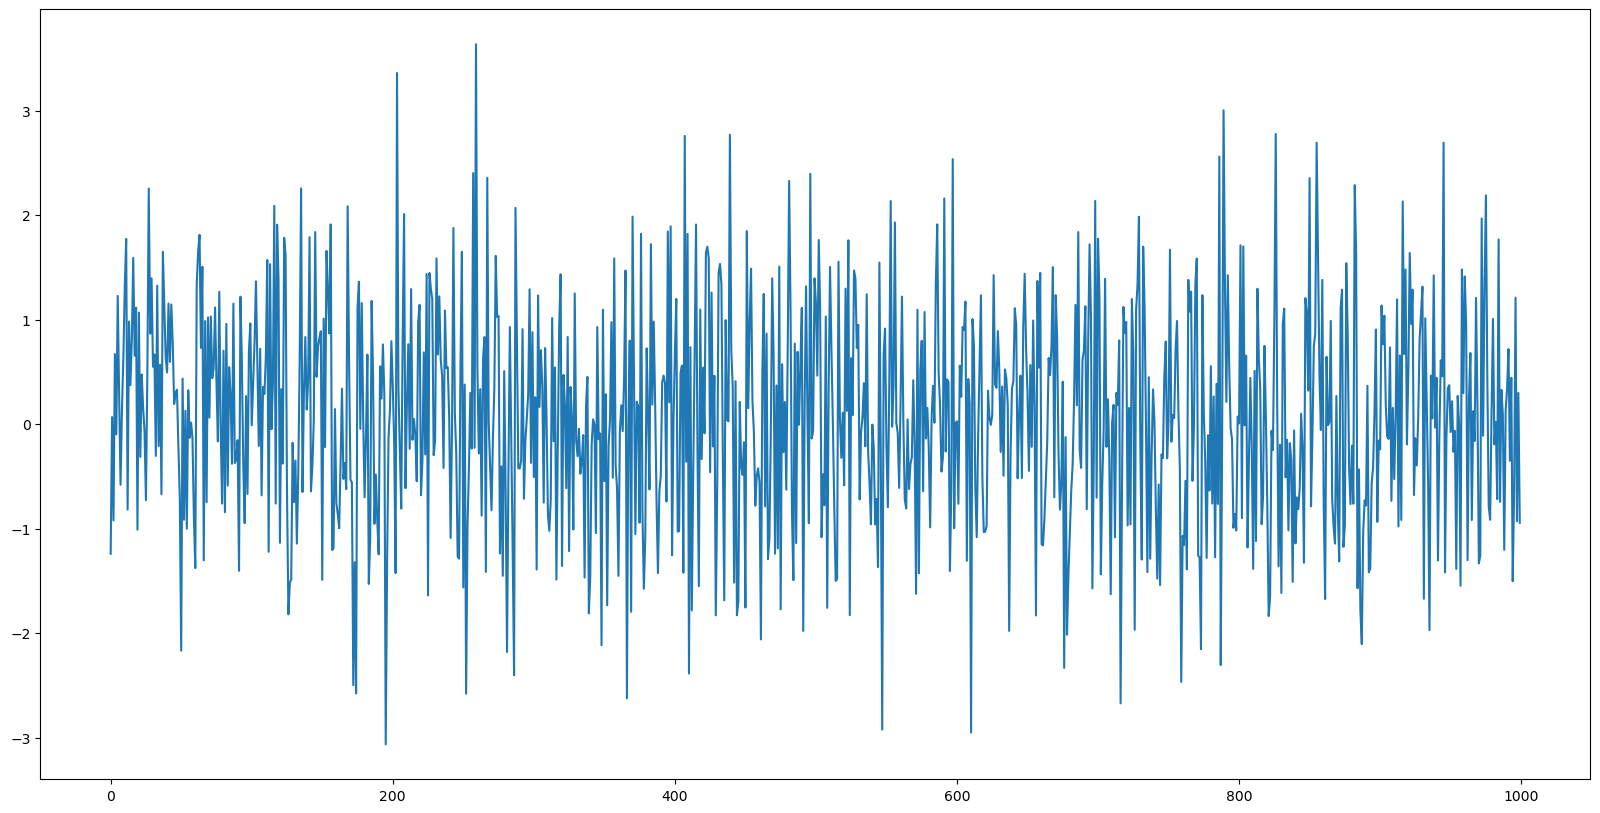

In [18]:
# passage de la série en différence première
plt.plot(np.diff(X))
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
   
<br>
    
## Conclusion : TS - DS
    
    
important de savoir quel type de processus

si présence taux de croissance
    
    
<br>
    
    
    
<hr style=" border: 2.5px solid black;">


# Saisonnalité <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p2'></a>


<hr style=" border: .5px solid black;">  
    
    
## Saisonnalité et conséquences <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p2.1'></a>

    

    
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">  
    
    
## Décomposition tendance-saisons : traitement de la saisonnalité <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p2.2'></a>



    
<br>
    
  
    
</span>

In [19]:
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose

# pour scrapper
import requests as rq
from bs4 import BeautifulSoup as bs
import json
import datetime as dt
from io import StringIO

In [20]:
# Données pour le crude oil
headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

url_base = "https://query1.finance.yahoo.com"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00
symbol = "^FCHI"
period1 = int(dt.datetime(2021,1,1).timestamp())
period2 = int(dt.datetime(2021,7,1).timestamp())
interval = "1d"

url_suite = "/v7/finance/download/%s?period1=%s&period2=%s&interval=%s" % (symbol, period1, period2, interval)

full_url = url_base + url_suite

resp = rq.get(full_url, headers=headers).text

str_io = StringIO(resp)


# création dataframe
df_cac = pd.read_csv(str_io, sep=",")

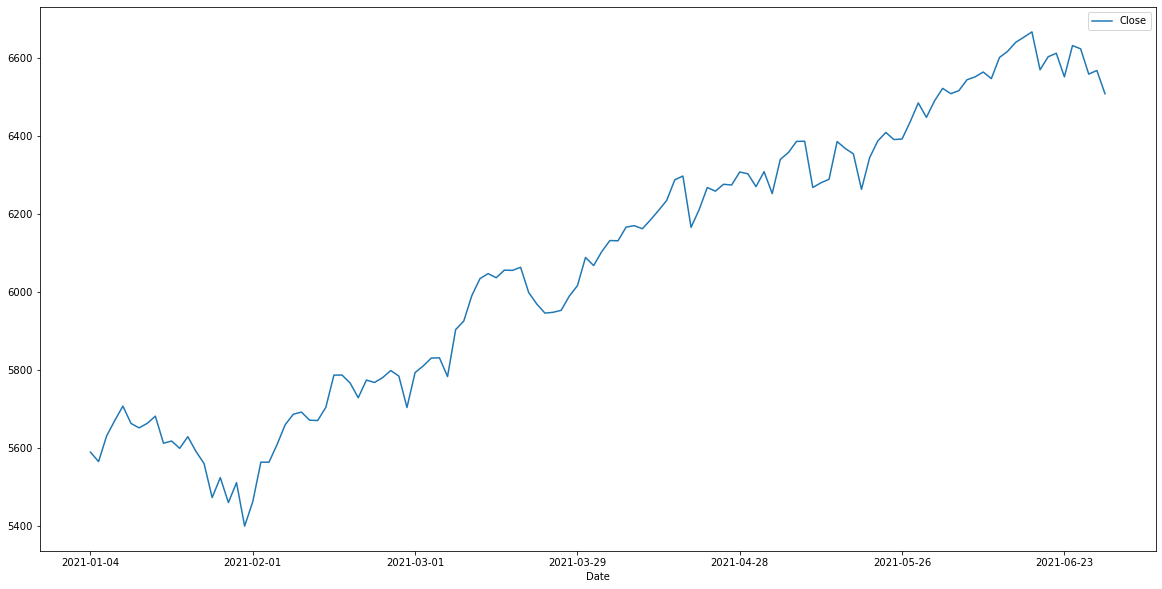

In [11]:
df_cac.plot("Date","Close")
plt.show()

In [137]:
analysis = df_cac.set_index('Date')[["Close"]].copy()
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative", period = 7)

df_cac["trend"] = [i for i in decompose_result_mult.trend]
df_cac["seasonal"] = [i for i in decompose_result_mult.seasonal]
df_cac["residual"] = [i for i in decompose_result_mult.resid]

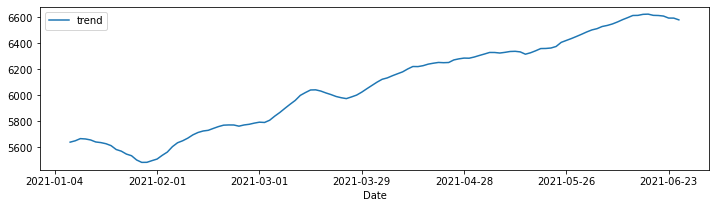

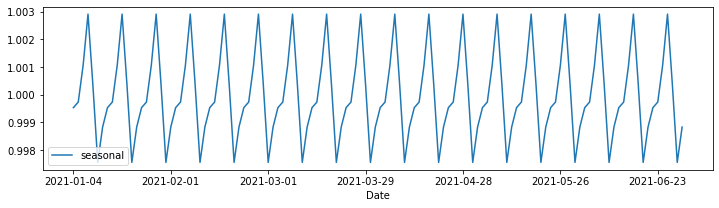

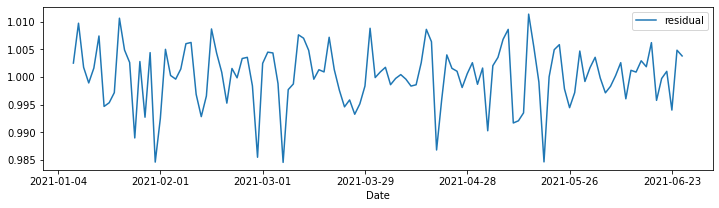

In [138]:
df_cac.plot("Date","trend", figsize=(12,3))
df_cac.plot("Date","seasonal", figsize=(12,3))
df_cac.plot("Date","residual", figsize=(12,3))
plt.show()

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>    
<hr style=" border: 2.5px solid black;">


# Détection de la non-stationnarité <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p3'></a>

    
    
<br>
    
- Les tests pemettant de savoir si les séries sont stationnaires ou non sont appelés tests de racine unitaire
- Il en existe un grand nombre. Nous présentons ici le plus répandu : Dickey-Fuller (DF) et Dickey-Fuller Augmenté (ADF)
- Dans les deux cas : 
    - $H_0$ : la série est non-stationnaire, c a d qu'elle contient au moins une racine unitaire
    - $H_1$ : la série est stationnaire, c a d qu'elle ne comporte pas de racine unitaire
    
    
<br>
    
    

<hr style=" border: .5px solid black;">  
    
    
## Test de Dickey-Fuller <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p3.1'></a>

<br>

- L'idée du test : tester les différentes structures possible de la série à laquelle nous nous intéressons en fonction des processus TS et DS
    
<br>
    

- Précisément, trois modèles nous intéressent : 
     - Modèle (3) : $\Delta Y_t = \alpha + \beta t + \phi Y_{t-1} + \epsilon_t$ 
     - Modèle (2) : $\Delta Y_t = \alpha +  \phi Y_{t-1} + \epsilon_t$ 
     - Modèle (1) : $\Delta Y_t =  \phi Y_{t-1} +  \epsilon_t$ 
 
<br>
    
    
- Soit : 
     - Modèle (3) : avec constante et tendance déterministe
     - Modèle (2) : avec constante, sans tendance déterministe
     - Modèle (1) : sans constante ni tendance déterministe 
    
    
<br>
    
    
- On regarde ici si $\phi$ est significativement différent de $0$ : nous utiliserons des tables spécifiques pour cela (voir test ADF).
    - si $\phi$ est significativement égale à $0$ : on ne rejette pas $H_0$ et la série est considérée comme non-stationnaire
    - sinon, on considère que la série est stationnaire
    
<br>
    
- Pour savoir dans quel modèle nous devons nous placer : on teste la significativité de la tendance et de la constante dans les modèles qui les contiennent (idem, nous devrons faire appelles à des tables spécifiques). 
    
<br>
    
- Les modèles du test simple sont trop restrictifs quand à la structure autorégressive des séries... d'où ADF

</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">  
    
    
## Test de Dickey-Fuller Augmenté <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p3.2'></a>
<br>
    
- Le principe est le même sauf que l'on considère l'éventualité d'une autocorrélation dans les séries
- Les trois modèles sont alors : 
     - Modèle (3) : $\Delta Y_t = \alpha + \beta t + \phi Y_{t-1} + \sum_{j=1}^{p} \varphi_i \Delta Y_{t-j} + \epsilon_t$
     - Modèle (2) : $\Delta Y_t = \alpha +  \phi Y_{t-1} + \sum_{j=1}^{p} \varphi_i \Delta Y_{t-j} + \epsilon_t$
     - Modèle (1) : $\Delta Y_t =  \phi Y_{t-1} + \sum_{j=1}^{p} \varphi_i \Delta Y_{t-j} + \epsilon_t$

<br>    
    
- Test ADF = Test unilatéral à gauche défini de la manière suivante
     - $H_0 : \phi = 0$
     - $H_1 : \phi < 0$
    

<br>
    
- Ainsi, contrairement aux règles de décisions habituelles pour les tests bilatéraux, la règle est inversée :
     - $t_{\varphi} > t_{DF}$ on ne rejette pas $H_0$ : Racine unitaire
     - $t_{\varphi} < t_{DF}$ on rejette $H_0$ : Stationnaire

<br>
    
- Pour effectuer le test ADF, on adopte une stratégie séquentielle à 4 étapes.

<br>
    
<b>Etape 1</b> :
- Choix du nombre de retards $p$ : plusieurs méthodes
 - on peut choisir l'ordre de l'AR $p$ pour la variable $\Delta Y$, sur la base des autocorrélations partielles de $\Delta Y$, et sur la base de la significativité du dernier retard de l'AR introduit dans la régression
 
 - on peut choisir $p$ sur la base de l'estimation de plusieurs modèles pour différentes valeurs de $p$, et on retient le modèle qui minimise les critères d'information (<b>AIC, BIC</b>)
    
    
<br>
    
<b>Etape 2</b> :

- Test de la racine unitaire $H_0$ : $\phi$ dans le modèle $(3)$, i.e. le plus général

$$\Delta Y_t = \alpha + \beta t + \phi Y_{t-1} + \sum_{j=1}^{p} \varphi_i \Delta Y_{t-j} + \epsilon_t$$

- On commence par tester la significativité de la tendance $H_0^{'}: \beta = 0$ en se référant aux valeurs critiques tabulées par DF (test bilatéral)
 - Si la tendance n'est pas significative, on va directement à l'étape $(3)$
 - Sinon, on teste dans le modèle $(3)$ la racine unitaire $H_0 : \phi = 0$ en comparant la $t_\phi$ aux valeurs tabulées par DF
  - Si non-rejet de $H_0$ : $Y$ est non-stationnaire, il faut recommencer la procédure sur la différence première de $Y$
  - Si rejet de $H_0$ : $Y \sim TS(Y_t \sim I(0) + T)$ la procédure s'arrête, on peut travailler sur $Y$ en le purgeant d'abord de sa tendance.   
    
    
    
    
<br>
    
<b>Etape 3</b> :

- On test la racine unitaire $H_0 : \phi = 0$ dans le modèle $(2)$

$$\Delta Y_t = \alpha + \phi Y_{t-1} + \sum_{j=1}^{p} \varphi_i \Delta Y_{t-j} + \epsilon_t$$

- On commence par tester la significativité de la constante $H_0^{''} : \alpha = 0$ en se référant aux valeurs critiques tabulées par $DF$ (test bilatéral) pour $t_\alpha$

 - Si la constante n'est pas significative, on va directement à l'étape $(4)$
 - Sinon, on teste dans le modèle $(2)$ la racine unitaire $H_0 : \phi = 0$ en comparant la $t_\phi$ aux valeurs tabulées par $DF$
  - Si acceptation de $H_0$ : $Y$ est non-stationnaire, il faut recommencer la procédure sur la différence première de $Y$
  - Si rejet de $H_0$ : $Y$ est un processus stationnaire avec constante $(Y_t \sim I(0) + C)$, la procédure s'arrête et on peut travailler directement sur Y
      
    
    
    
    
<br>
    
<b>Etape 4</b> :

- On teste la racine unitaire $H_0 : \phi = 0$ dans le modèle $(1)$

$$\Delta Y_t = \phi Y_{t-1} + \sum_{j=1}^{p} \varphi_i \Delta Y_{t-j} + \epsilon_t$$

 - Si acceptation de $H_0$ : $Y$ est non-stationnaire, il faut recommencer la procédure sur la différence première de $Y$
 - Si rejet de $H_0$ : $Y$ est un processus stationnaire centré ($Y_t \sim I(0)$), la procédure s'arrête et on peut travailler directement sur $Y$    
    
    
    
    
    
<br>
    

</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>



- Valeurs critiques de la constante et de la tendance dans le test de Dickey-Fuller

<table>
    <col width="50">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <tr>
        <td colspan="1" style="text-align: center;border-right: 2px solid black"></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black"><i>Modèle [2]</i></td>
        <td colspan="6" style="text-align: center;border-right: 2px solid black"><i>Modèle [3]</i></td>
    </tr>
    <tr>
        <td colspan="1" style="text-align: center;border-right: 2px solid black"></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Constante</td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Constante</td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black">Trend</td>
    </tr>
    <tr style="text-align: center;border-bottom: 2px solid black">
        <td style="text-align: center;border-right: 2px solid black">T</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">100</td>
        <td style="text-align: center;border-right: 2px dotted black">3.22</td>
        <td style="text-align: center;border-right: 2px dotted black">2.54</td>
        <td style="text-align: center;border-right: 2px solid black">2.17</td>
        <td style="text-align: center;border-right: 2px dotted black">3.78</td>
        <td style="text-align: center;border-right: 2px dotted black">3.11</td>
        <td style="text-align: center;border-right: 2px solid black">2.73</td>
        <td style="text-align: center;border-right: 2px dotted black">3.53</td>
        <td style="text-align: center;border-right: 2px dotted black">2.79</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">250</td>
        <td style="text-align: center;border-right: 2px dotted black">3.19</td>
        <td style="text-align: center;border-right: 2px dotted black">2.53</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.74</td>
        <td style="text-align: center;border-right: 2px dotted black">3.09</td>
        <td style="text-align: center;border-right: 2px solid black">2.73</td>
        <td style="text-align: center;border-right: 2px dotted black">3.49</td>
        <td style="text-align: center;border-right: 2px dotted black">2.79</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">500</td>
        <td style="text-align: center;border-right: 2px dotted black">3.18</td>
        <td style="text-align: center;border-right: 2px dotted black">2.52</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.08</td>
        <td style="text-align: center;border-right: 2px solid black">2.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.48</td>
        <td style="text-align: center;border-right: 2px dotted black">2.78</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">$\infty$</td>
        <td style="text-align: center;border-right: 2px dotted black">3.18</td>
        <td style="text-align: center;border-right: 2px dotted black">2.52</td>
        <td style="text-align: center;border-right: 2px solid black">2.16</td>
        <td style="text-align: center;border-right: 2px dotted black">3.71</td>
        <td style="text-align: center;border-right: 2px dotted black">3.08</td>
        <td style="text-align: center;border-right: 2px solid black">2.72</td>
        <td style="text-align: center;border-right: 2px dotted black">3.46</td>
        <td style="text-align: center;border-right: 2px dotted black">2.78</td>
        <td style="text-align: center;border-right: 2px solid black">2.38</td>
    </tr>
</table>
</span>

si t>2.79 elle est significative 

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
    
- Valeurs critiques du test Dickey-Fuller $\rho = 1 \Leftrightarrow \phi = 0$

<table>
    <col width="50">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <col width="70">
    <tr>
        <td style="text-align: center;border-right: 2px solid black"></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black"><i>Modèle [1]</i></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black"><i>Modèle [2]</i></td>
        <td colspan="3" style="text-align: center;border-right: 2px solid black"><i>Modèle [3]</i></td>
    </tr>
    <tr style="text-align: center;border-bottom: 2px solid black">
        <td style="text-align: center;border-right: 2px solid black">T</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black"> 10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
        <td style="text-align: center;border-right: 2px dotted black">1%</td>
        <td style="text-align: center;border-right: 2px dotted black">5%</td>
        <td style="text-align: center;border-right: 2px solid black">10%</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">100</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.60</td>
        <td style="text-align: center;border-right: 2px dotted black">-1.95</td>
        <td style="text-align: center;border-right: 2px solid black">-1.61</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.51</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.89</td>
        <td style="text-align: center;border-right: 2px solid black">-2.58</td>
        <td style="text-align: center;border-right: 2px dotted black">-4.04</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.45</td>
        <td style="text-align: center;border-right: 2px solid black">-3.15</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">250</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.58</td>
        <td style="text-align: center;border-right: 2px dotted black">-1.95</td>
        <td style="text-align: center;border-right: 2px solid black">-1.62</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.46</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.88</td>
        <td style="text-align: center;border-right: 2px solid black">-2.57</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.99</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.43</td>
        <td style="text-align: center;border-right: 2px solid black">-3.13</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">500</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.58</td>
        <td style="text-align: center;border-right: 2px dotted black">-1.95</td>
        <td style="text-align: center;border-right: 2px solid black">-1.62</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.44</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.87</td>
        <td style="text-align: center;border-right: 2px solid black">-2.57</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.98</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.42</td>
        <td style="text-align: center;border-right: 2px solid black">-3.13</td>
    </tr>
    <tr>
        <td style="text-align: center;border-right: 2px solid black">$\infty$</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.58</td>
        <td style="text-align: center;border-right: 2px dotted black">-1.95</td>
        <td style="text-align: center;border-right: 2px solid black">-1.62</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.43</td>
        <td style="text-align: center;border-right: 2px dotted black">-2.86</td>
        <td style="text-align: center;border-right: 2px solid black">-2.57</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.96</td>
        <td style="text-align: center;border-right: 2px dotted black">-3.41</td>
        <td style="text-align: center;border-right: 2px solid black">-3.12</td>
    </tr>
</table>    
    
    
    
    
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>
<hr style=" border: .5px solid black;">  
    
    
## Application <font color='blue' size="1.5"><i>[Plan du cours](#plan)</i></font><a id='p3.3'></a>

<br>
    
- Nous allons tester la stationnarité de la série du CAC40 importée plus haut
- Pour cela, nous menons un test ADF
    
    
</span>

In [24]:
from statsmodels.tsa.stattools import adfuller

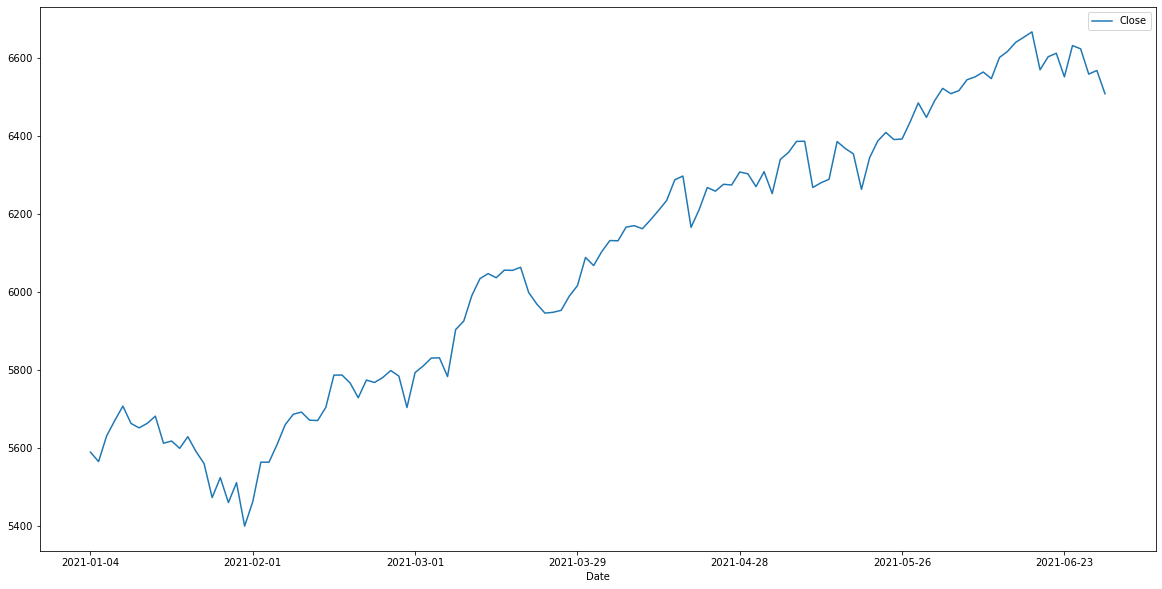

In [13]:
df_cac.plot("Date","Close")
plt.show()

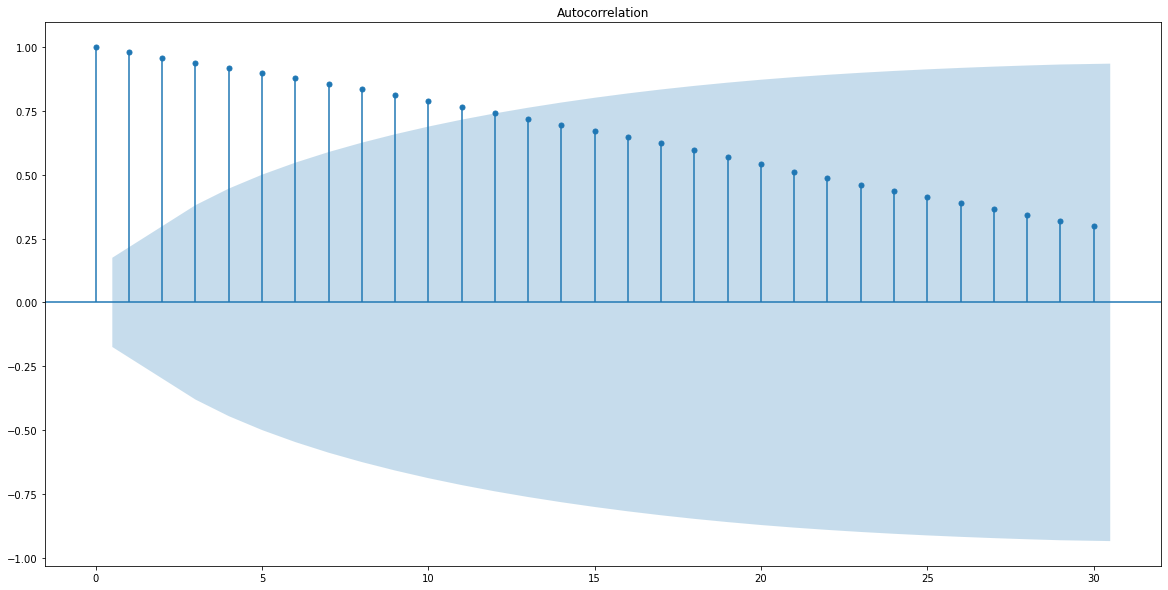

In [14]:
# corrélogramme
plt.rcParams['figure.figsize'] = (20,10)

plot_acf(df_cac["Close"], lags=30)
plt.show()

a priori pas stationnaire

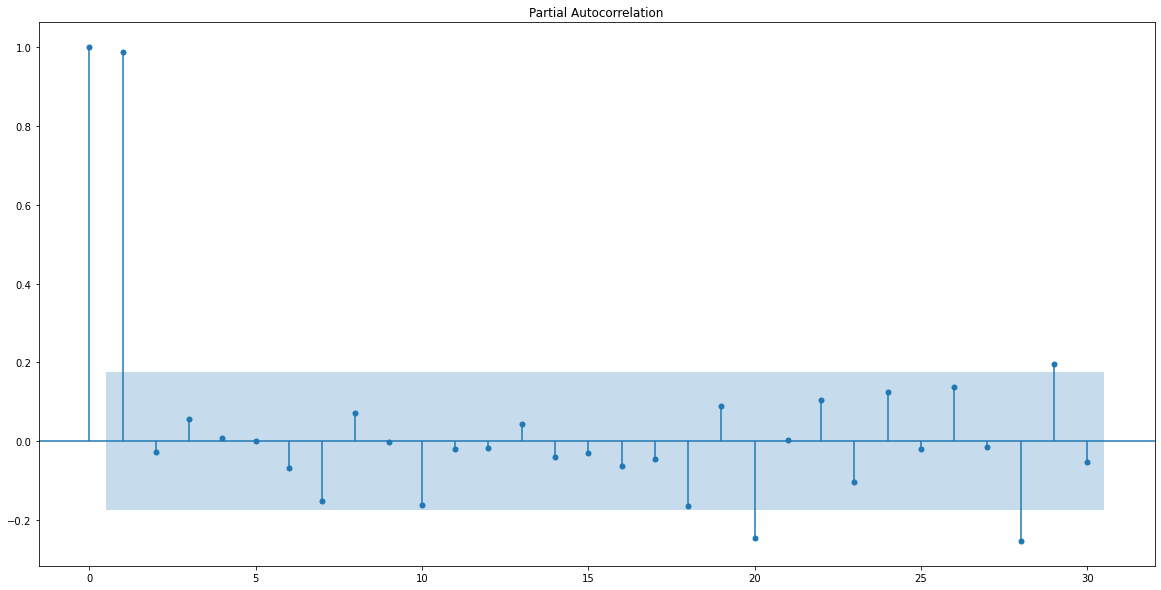

In [15]:
# corrélogramme
plt.rcParams['figure.figsize'] = (20,10)

plot_pacf(df_cac["Close"], lags=30)
plt.show()

forte dépendance à l'ordre 1 entre $y_t$ et $y_{t-1}$

In [29]:
# On commence par le modèle avec tendance et constante :
"""On stock les résultats du test dans une variable ici nommée adf1:
    - On appelle la fonction de test adf
    - On spécifie la variable pour laquelle on veut faire le test. Ici : Close
    - On donne en option le modèle. Ici on commence par constante et tendance, donc : "ct"
    - Le nombre de LAG est choisi via automatiquement sous le critère d'information AIC
    - On demande à stocker les résultats pour pouvoir regarder la significativité de la tendance
"""

adf1 = adfuller(df_cac['Close'], regression='ct', autolag='AIC', regresults=True)

In [30]:
# Nous devons ensuite regarder si la tendance est significative, on affiche donc les résultats

adf1[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     5.176
Date:                Thu, 16 Nov 2023   Prob (F-statistic):            0.00696
Time:                        18:10:20   Log-Likelihood:                -649.26
No. Observations:                 125   AIC:                             1305.
Df Residuals:                     122   BIC:                             1313.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1658      0.052     -3.212      0.002      -0.268      -0.064
const        914.4098    282.105      3.241      0.002     355.955    1472.864
x2             1.5839      0.511      3.098      0.002       0.572       2.596
==============================================================================
Omnibus:                       15.326   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.108
Skew:                          -0.803   Prob(JB):                     0.000193
Kurtosis:                       3.839   Cond. No.                     4.35e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.35e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
adf1

(-3.2120407818589922,
 0.08202901616541214,
 {'1%': -4.03308287936, '5%': -3.4462147354879997, '10%': -3.14799745856},
 <statsmodels.stats.diagnostic.ResultsStore at 0x273ae0b2df0>)

pour le premier supérieur trend non significativement différent de 0

pour le deuxième inférieur non rejet : non stationnnaire

$y_t$ non stationnaire

$y_t - y_{t-1}$ stationnnaire

$Y$ est $I(1)$ (intégré d'ordre 1)

une variable stationnaire de base est intégré d'ordre 0

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<br>
    
    
- 1 seul retard retenu par le test ($p=1$)
- la dernière ligne donne la tendance : elle est significative (attention, on compare avec la table de DF)
- on s'arrête donc à cette étape et on regarde la valeur de la statistique de test :
    
<br>    
</span>

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<br>

Comment interpréter les résultats :
- Valeur du test DF
- P-valeur associée au test (hypothèse nulle : la série contient au moins une racine unitaire, 
    donc si la p-value > 0.05, on ne rejette pas l'hypothèse nulle et la série contient au moins
    une racine unitaire)
- Un dictionnaire est donné ensuite avec les valeurs tabulées du test en fonction du nombre d'observations
- Le dernier élément est un objet contenant les résultats du modèle
    
    
<br>  
    
- Nous devons différencier notre série et tester à nouveau la stationnarité : si la série différenciée est stationnaire, on dit qu'elle est intégrée d'ordre 1 et on peut travailler sur sa différence.
    
<br>
</span>

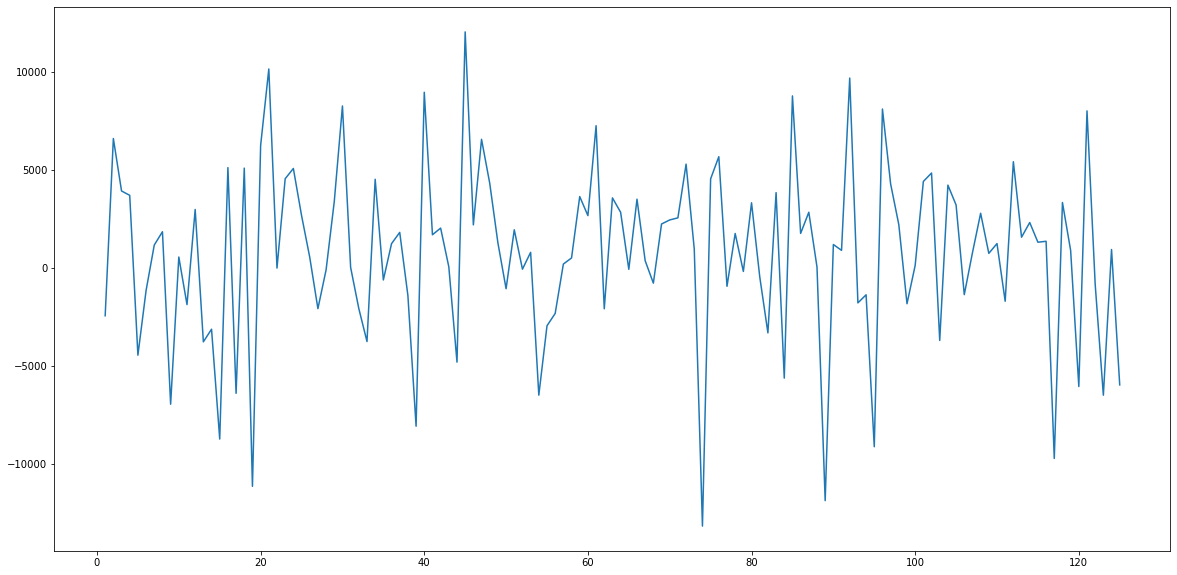

In [146]:
df_cac['dClose'] = (df_cac['Close'] - df_cac['Close'].shift(1))*100
plt.plot(df_cac['dClose'])
plt.show()

Il semblerait qu'en prenant la différent on a effacer la tendance

In [149]:
# On recommence par le modèle avec tendance et constante :
"""On stock les résultats du test dans une variable ici nommée adf2:
    - On appelle la fonction de test adf
    - On spécifie la variable pour laquelle on veut faire le test. Ici : dClose
    - On donne en option le modèle. Ici on commence par constante et tendance, donc : "ct"
    - Le nombre de LAG est choisi via automatiquement sous le critère d'information AIC
    - On demande à stocker les résultats pour pouvoir regarder la significativité de la tendance
"""

adf2 = adfuller(df_cac['dClose'].dropna(), regression='ct', autolag='AIC', regresults=True)

In [150]:
# Nous devons ensuite regarder si la tendance est significative, on affiche donc les résultats

adf2[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     82.02
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           3.06e-23
Time:                        04:34:02   Log-Likelihood:                -1218.8
No. Observations:                 124   AIC:                             2444.
Df Residuals:                     121   BIC:                             2452.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1572      0.090    -12.803      0.000      -1.336      -0.978
const       1088.1009    824.820      1.319      0.190    -544.848    2721.050
x2            -3.2541     11.413     -0.285      0.776     -25.849      19.341
==============================================================================
Omnibus:                       10.456   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.750
Skew:                          -0.619   Prob(JB):                      0.00463
Kurtosis:                       3.739   Cond. No.                     9.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<br>
    
    
- 1 seul retard retenu par le test ($p=1$)
- la dernière ligne donne la tendance : elle est non significative (attention, on compare avec la table de DF)
- on passe donc à l'étape $2$ : modèle avec constante et sans tendance
    
<br>    
</span>

In [151]:
# On recommence par le modèle sans tendance et avec constante :
"""On stock les résultats du test dans une variable ici nommée adf1:
    - On appelle la fonction de test adf
    - On spécifie la variable pour laquelle on veut faire le test. Ici : dClose
    - On donne en option le modèle. Ici on commence par constante et sans tendance, donc : "c"
    - Le nombre de LAG est choisi via automatiquement sous le critère d'information AIC
    - On demande à stocker les résultats pour pouvoir regarder la significativité de la constante
"""

adf2 = adfuller(df_cac['dClose'].dropna(), regression='c', autolag='AIC', regresults=True)

In [152]:
# Nous devons ensuite regarder si la tendance est significative, on affiche donc les résultats

adf2[3].resols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     165.2
Date:                Thu, 04 Nov 2021   Prob (F-statistic):           1.97e-24
Time:                        04:36:34   Log-Likelihood:                -1218.9
No. Observations:                 124   AIC:                             2442.
Df Residuals:                     122   BIC:                             2447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.1573      0.090    -12.853      0.000      -1.336      -0.979
const        884.8051    413.127      2.142      0.034      66.980    1702.630
==============================================================================
Omnibus:                       10.438   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.765
Skew:                          -0.615   Prob(JB):                      0.00460
Kurtosis:                       3.757   Cond. No.                     4.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<br>
    
    
- 1 seul retard retenu par le test ($p=1$)
- la constante est sigificative (attention, on compare avec la table de DF)
- on s'arrête donc là et on regarde la statistique du test :
    
<br>    
</span>

In [153]:
adf2

(-12.853287733584134,
 5.296660221723913e-24,
 {'1%': -3.484219653271961,
  '5%': -2.885145235641637,
  '10%': -2.579359138917794},
 <statsmodels.stats.diagnostic.ResultsStore at 0x298010aacc8>)

<span style='line-height:1.5;font-size: 17px;font-family:"Times New Roman"'>

<br>
    
    
- à $1\%$ la série est stationnaire : on peut donc s'arrêter là et travailler sur la série en différence
- généralement : on prendra plutôt le taux de croissance que la différence (interprétation plus simple des résultats).
    
<br>  
    
    
## Conclusion : vocabulaire et application
    
<br>
    
- Vocabulaire : ordre d'intégration
    
<br>
    
- Interprétation et application : équivalence des mesures, on travaille sur des séries intégrées de même ordre !! 
    
    
</span>